In [1]:
import pandas as pd
import numpy as np

In [2]:
#%matplotlib notebook

In [2]:
# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()

In [3]:
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
import matplotlib.pyplot as plt

In [4]:
pd.read_csv('/Volumes/Experiment Data/Sasha and Or/NC/Events.csv').columns

Index(['126461208357', 'simset_10', 'Unnamed: 2', 'Unnamed: 3'], dtype='object')

In [5]:
test_events = pd.read_csv('/Volumes/Experiment Data/Sasha and Or/NC/Events.csv')

In [9]:
test_events.head()

126461208357  simset_10  Unnamed: 2  Unnamed: 3
126562409533 Looking            90  -3.318967   -3.030237         NaN
126592579450 Looking            86   4.371662    2.580307         NaN
126622825204 Looking             6  -0.718936   -2.303019         NaN
126653394737 Looking            89  -1.747800   -2.993882         NaN
126683588592 Looking            83   4.391500    4.699649         NaN

In [12]:
[int(test_events.loc[img][0]) for img in test_events.index]

[90,
 86,
 6,
 89,
 83,
 23,
 77,
 4,
 11,
 17,
 55,
 28,
 31,
 3,
 51,
 40,
 29,
 92,
 32,
 91,
 79,
 25,
 60,
 63,
 35,
 66,
 10,
 81,
 69,
 58,
 33,
 80,
 85,
 61,
 62,
 65,
 96,
 34,
 21,
 16,
 13,
 2,
 70,
 64,
 78,
 20,
 45,
 94,
 26,
 41,
 88,
 42,
 0,
 68,
 30,
 46,
 99,
 39,
 98,
 37,
 93,
 43,
 8,
 47,
 9,
 82,
 19,
 75,
 84,
 48,
 1,
 97,
 5,
 18,
 87,
 22,
 67,
 52,
 74,
 95,
 54,
 72,
 76,
 73,
 15,
 57,
 27,
 24,
 59,
 50,
 56,
 14,
 49,
 53,
 36,
 12,
 71,
 7,
 44,
 38,
 22,
 78,
 96,
 11,
 38,
 70,
 90,
 23,
 23,
 29,
 98,
 26,
 43,
 5,
 62,
 72,
 36,
 77,
 2,
 51,
 24,
 57]

In [8]:
int(test_events.columns[1].split('_')[1])

10

In [294]:
121625154088E-7

12162.5154088

In [302]:
events.apply(lambda x:x/10E2)

0      121.726307
1      121.756574
2      121.786829
3      121.817024
4      121.847165
          ...    
119    125.361516
120    125.391780
121    125.422055
122    125.452330
123    125.482589
Name: unity_time, Length: 124, dtype: float64

In [4]:
def load_events(part='OA'):
    base_path = '/Volumes/Experiment Data/Sasha and Or/'
    events_path = base_path+part+'/Events.csv'
    _events_df = pd.read_csv(events_path,on_bad_lines='warn')
    
    _simset = int(_events_df.columns[1].split('_')[1])
    
    _imgs = [int(_events_df.loc[img][0]) for img in _events_df.index]
    
    _onsets = pd.Series([onset[0] for onset in _events_df.index],name='unity_time')
    _onsets = _onsets.apply(lambda x:x/1E7)
    # first line contains a timestamp but no "Looking" tag or eye data - ignore?
    #_events_onsets.insert(0,int(_events_df.columns[0]))
    print(str(len(_imgs)),'stimuli,',str(len(_onsets)),'events onsets' ,'- participant',part)
    # return pd.Series(_events_onsets,name='unity_time').apply(lambda x: x/1E7), _simset
    return _onsets, _simset, _imgs

Load events onsets, simsets, img presentation for each participant

In [5]:
oa_events, oa_simset, oa_imgset = load_events(part='OA')

124 stimuli, 124 events onsets - participant OA


In [6]:
sg_events, sg_simset, sg_imgset = load_events(part='SG')

122 stimuli, 122 events onsets - participant SG


In [7]:
nc_events, nc_simset, nc_imgset = load_events(part='NC')

122 stimuli, 122 events onsets - participant NC


In [8]:
vt_events, vt_simset, vt_imgset = load_events(part='VT')

122 stimuli, 122 events onsets - participant VT


In [9]:
tl_events, tl_simset, tl_imgset = load_events(part='TL')

122 stimuli, 122 events onsets - participant TL


In [10]:
nh_events, nh_simset, nh_imgset = load_events(part='NH')

122 stimuli, 122 events onsets - participant NH


In [21]:
part_list = ['OA','SG','NC','VT','TL','NH']
base_path = '/Volumes/Experiment Data/Sasha and Or/'
for part in part_list:
    events_path = base_path+part+'/Gaze data.csv'
    print(part,set(pd.read_csv(events_path,on_bad_lines='warn')['EyeID']))

OA {'Monocular_0', 'Binocular', 'Monocular_1'}
SG {'Monocular_0', 'Binocular', 'Monocular_1'}
NC {'Monocular_0', 'Binocular', 'Monocular_1'}
VT {'Monocular_0', 'Binocular', 'Monocular_1'}
TL {'Monocular_0', 'Binocular', 'Monocular_1'}
NH {'Monocular_0', 'Binocular', 'Monocular_1'}


In [25]:
part_list = ['OA','SG','NC','VT','TL','NH']
base_path = '/Volumes/Experiment Data/Sasha and Or/'
eye_set = set(['Monocular_0', 'Binocular', 'Monocular_1'])
for part in part_list:
    events_path = base_path+part+'/Gaze data.csv'
    _df = pd.read_csv(events_path,on_bad_lines='warn')['EyeID']
    print(part,set(pd.read_csv(events_path,on_bad_lines='warn')['EyeID']))
    # try:
    #     for _eye in eye_set:
    #         print(len(_df[_df['EyeID']==_eye]))

OA {'Monocular_0', 'Binocular', 'Monocular_1'}
SG {'Monocular_0', 'Binocular', 'Monocular_1'}
NC {'Monocular_0', 'Binocular', 'Monocular_1'}
VT {'Monocular_0', 'Binocular', 'Monocular_1'}
TL {'Monocular_0', 'Binocular', 'Monocular_1'}
NH {'Monocular_0', 'Binocular', 'Monocular_1'}


In [11]:
def load_right_left_gaze(part='OA'):
    base_path = '/Volumes/Experiment Data/Sasha and Or/'
    events_path = base_path+part+'/Gaze data.csv'
    _gaze_df = pd.read_csv(events_path,on_bad_lines='warn')
    # Ofer 8.5.22 ID-ed 
    # hunch these should be reversed as per hist
    _ODgaze_df = _gaze_df[_gaze_df['EyeID']=='Monocular_0']
    _OSgaze_df = _gaze_df[_gaze_df['EyeID']=='Monocular_1']
    
    _ODgaze_df['unity_time'] = _ODgaze_df['unity_time'].apply(lambda x: x/1E7)
    _OSgaze_df['unity_time'] = _OSgaze_df['unity_time'].apply(lambda x: x/1E7)
    return _ODgaze_df, _OSgaze_df

In [123]:
part = 'NH'
base_path = '/Volumes/Experiment Data/Sasha and Or/'
events_path = base_path+part+'/Gaze data.csv'
nh_gaze_df = pd.read_csv(events_path,on_bad_lines='warn')

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Experiment Data/Sasha and Or/NH/Gaze data.csv'

In [12]:
part_list = ['OA','SG','NC','VT','TL','NH']
gaze_dict = { _part : load_right_left_gaze(part=_part) for _part in part_list}

/var/folders/rb/lgc56cn15k5gkgsw15bty8n00000gn/T/ipykernel_15164/3444206905.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _ODgaze_df['unity_time'] = _ODgaze_df['unity_time'].apply(lambda x: x/1E7)
/var/folders/rb/lgc56cn15k5gkgsw15bty8n00000gn/T/ipykernel_15164/3444206905.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _OSgaze_df['unity_time'] = _OSgaze_df['unity_time'].apply(lambda x: x/1E7)
/var/folders/rb/lgc56cn15k5gkgsw15bty8n00000gn/T/ipykernel_15164/3444206905.py:10: SettingWithCopyWarnin

In [19]:
gaze_dict.keys()

dict_keys(['OA', 'SG', 'NC', 'VT', 'TL', 'NH'])

Confidence

In [14]:
# index for gaze dict
deceyeder_dict = {}
for part in part_list:
    od_confidence = gaze_dict[part][0]['confidence']
    os_confidence = gaze_dict[part][1]['confidence']
    
    deceyeder_dict[part] = 0 if od_confidence.describe()['50%'] >= os_confidence.describe()['50%'] else 1
    
    # TODO make decision using slice where unity_time is not more than 3 seconds after the last (100th) event?

In [65]:
deceyeder_dict

{'OA': 1, 'SG': 1, 'NC': 1, 'VT': 0, 'TL': 0, 'NH': 1}

In [105]:
gaze_dict['NC'][0]['confidence'].describe()

count    59195.000000
mean         0.269900
std          0.163455
min          0.000000
25%          0.153917
50%          0.301852
75%          0.378938
max          1.000000
Name: confidence, dtype: float64

In [106]:
gaze_dict['NC'][1]['confidence'].describe()

count    58537.000000
mean         0.567043
std          0.360275
min          0.000000
25%          0.260232
50%          0.575595
75%          0.907781
max          1.000000
Name: confidence, dtype: float64

In [107]:
gaze_dict['VT'][0]['confidence'].describe()

count    44008.000000
mean         0.353810
std          0.322276
min          0.000000
25%          0.000000
50%          0.298590
75%          0.452683
max          1.000000
Name: confidence, dtype: float64

In [108]:
gaze_dict['VT'][1]['confidence'].describe()

count    45613.000000
mean         0.202365
std          0.272639
min          0.000000
25%          0.000000
50%          0.000000
75%          0.330240
max          1.000000
Name: confidence, dtype: float64

In [109]:
gaze_dict['TL'][0]['confidence'].describe()

count    43501.000000
mean         0.126645
std          0.244475
min          0.000000
25%          0.000000
50%          0.000000
75%          0.189085
max          1.000000
Name: confidence, dtype: float64

In [110]:
gaze_dict['TL'][1]['confidence'].describe()

count    43138.000000
mean         0.153720
std          0.305500
min          0.000000
25%          0.000000
50%          0.000000
75%          0.169242
max          1.000000
Name: confidence, dtype: float64

In [114]:
gaze_dict['NH'][0]['confidence'].describe()

count    29834.000000
mean         0.025096
std          0.110089
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: confidence, dtype: float64

In [115]:
gaze_dict['NH'][1]['confidence'].describe()

count    45128.000000
mean         0.560805
std          0.361310
min          0.000000
25%          0.231755
50%          0.739210
75%          0.848295
max          1.000000
Name: confidence, dtype: float64

In [117]:
len(gaze_dict['NH'][0])

29834

In [118]:
len(gaze_dict['NH'][1])

45128

In [121]:
gaze_dict['NH'][0]['EyeID'].describe()

count           29834
unique              1
top       Monocular_0
freq            29834
Name: EyeID, dtype: object

In [120]:
gaze_dict['NH'][1]['EyeID'].describe()

count           45128
unique              1
top       Monocular_1
freq            45128
Name: EyeID, dtype: object

In [ ]:
len()

In [15]:
gaze_dict['NC'][0]['confidence'].hist(bins=50)

<IPython.core.display.Javascript object>

<AxesSubplot:>

In [146]:
nc_events[100]

12958.774571

In [147]:
nc_events[0]

12656.2409533

<AxesSubplot:>

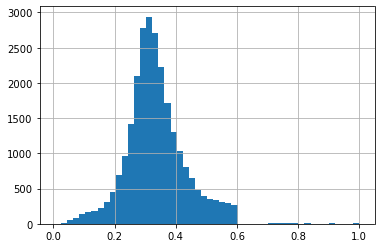

In [149]:
gaze_dict['NC'][0][gaze_dict['NC'][0]['unity_time']< nc_events[100]]['confidence'].hist(bins=50)

In [150]:
gaze_dict['NC'][0][gaze_dict['NC'][0]['unity_time']< nc_events[100]]['confidence'].describe()

count    25461.000000
mean         0.335158
std          0.097872
min          0.004766
25%          0.280021
50%          0.324640
75%          0.381994
max          1.000000
Name: confidence, dtype: float64

In [152]:
gaze_dict['NC'][1][gaze_dict['NC'][1]['unity_time']< nc_events[100]]['confidence'].describe()

count    26064.000000
mean         0.841500
std          0.181030
min          0.168763
25%          0.804981
50%          0.894800
75%          0.967713
max          1.000000
Name: confidence, dtype: float64

In [71]:
gaze_dict['NC'][0]['confidence'].describe()

count    59195.000000
mean         0.269900
std          0.163455
min          0.000000
25%          0.153917
50%          0.301852
75%          0.378938
max          1.000000
Name: confidence, dtype: float64

<AxesSubplot:>

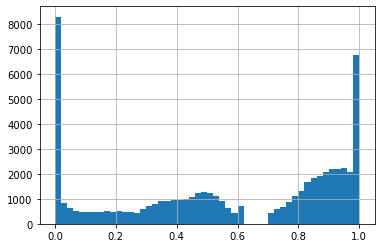

In [70]:
gaze_dict['NC'][1]['confidence'].hist(bins=50)

<AxesSubplot:>

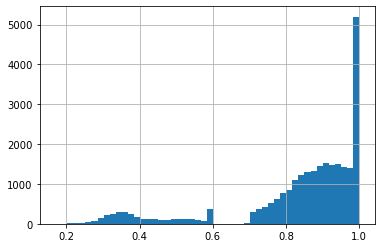

In [153]:
gaze_dict['NC'][1][gaze_dict['NC'][1]['unity_time']< nc_events[100]]['confidence'].hist(bins=50)

In [ ]:
gaze_dict['NC'][1][gaze_dict['NC'][1]['unity_time']< nc_events[100]]['confidence']

In [72]:
gaze_dict['NC'][1]['confidence'].describe()

count    58537.000000
mean         0.567043
std          0.360275
min          0.000000
25%          0.260232
50%          0.575595
75%          0.907781
max          1.000000
Name: confidence, dtype: float64

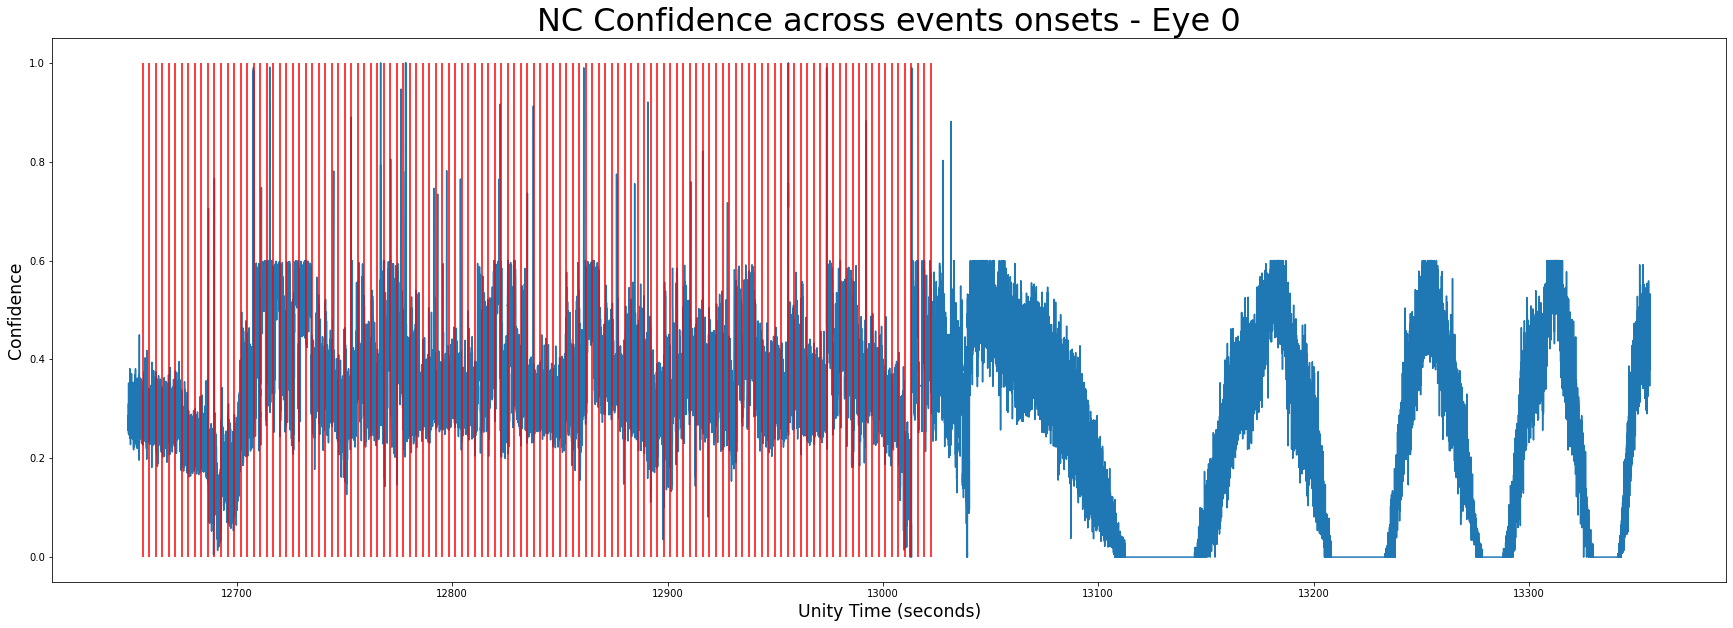

In [96]:
fig, ax = plt.subplots(figsize=(30,10))
ax.plot(gaze_dict['NC'][0]['unity_time'], gaze_dict['NC'][0]['confidence'])

# ax.plot(oa_eventsOnsets_series)
plt.xlabel('Unity Time (seconds)',fontsize='xx-large')
plt.ylabel('Confidence',fontsize='xx-large')


events = nc_events

plt.vlines(x=nc_events,ymin=0,ymax=1,colors='red')
plt.title('NC Confidence across events onsets - Eye 0',fontsize=32)

plt.tick_params()
plt.show()

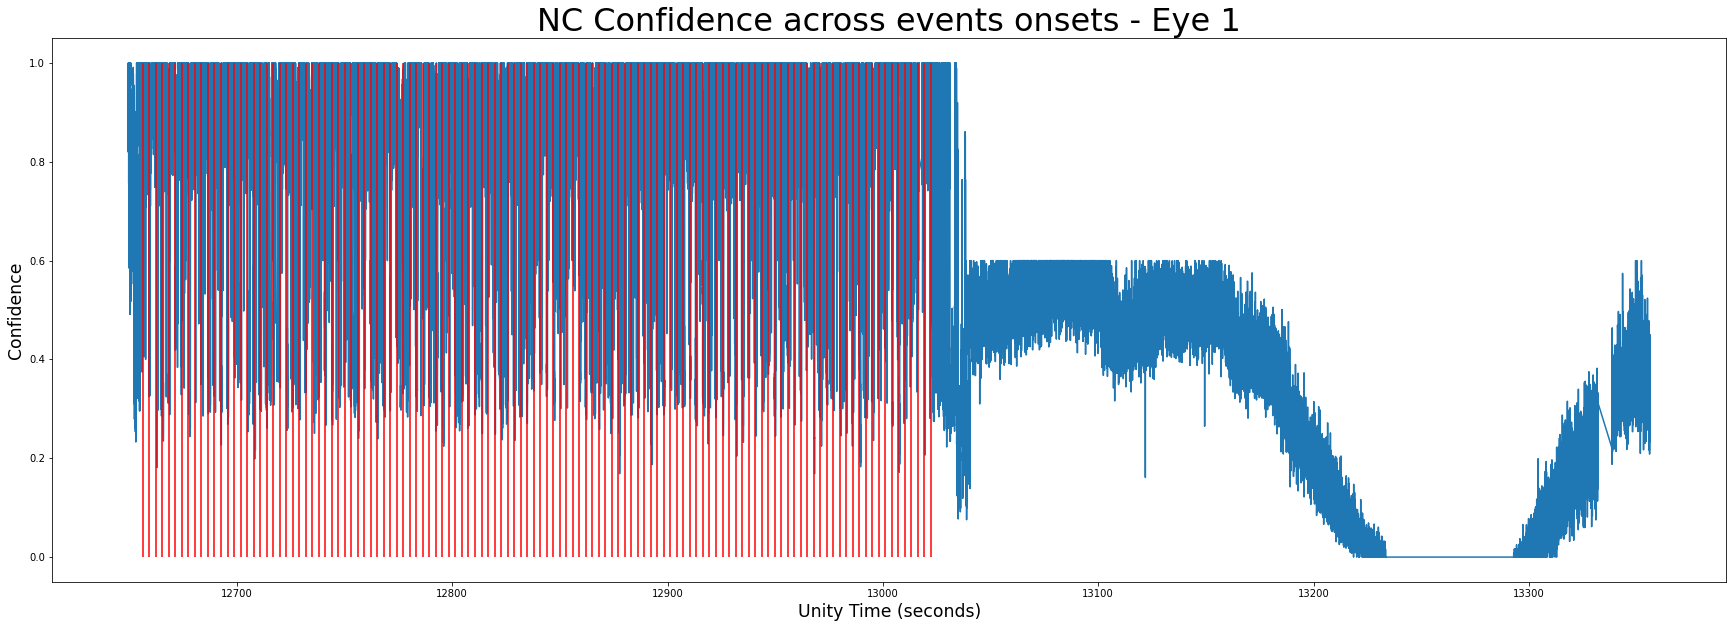

In [95]:
fig, ax = plt.subplots(figsize=(30,10))
ax.plot(gaze_dict['NC'][1]['unity_time'], gaze_dict['NC'][1]['confidence'])

# ax.plot(oa_eventsOnsets_series)
plt.xlabel('Unity Time (seconds)',fontsize='xx-large')
plt.ylabel('Confidence',fontsize='xx-large')


events = nc_events

plt.vlines(x=nc_events,ymin=0,ymax=1,colors='red')
plt.title('NC Confidence across events onsets - Eye 1',fontsize=32)

plt.tick_params()
plt.show()

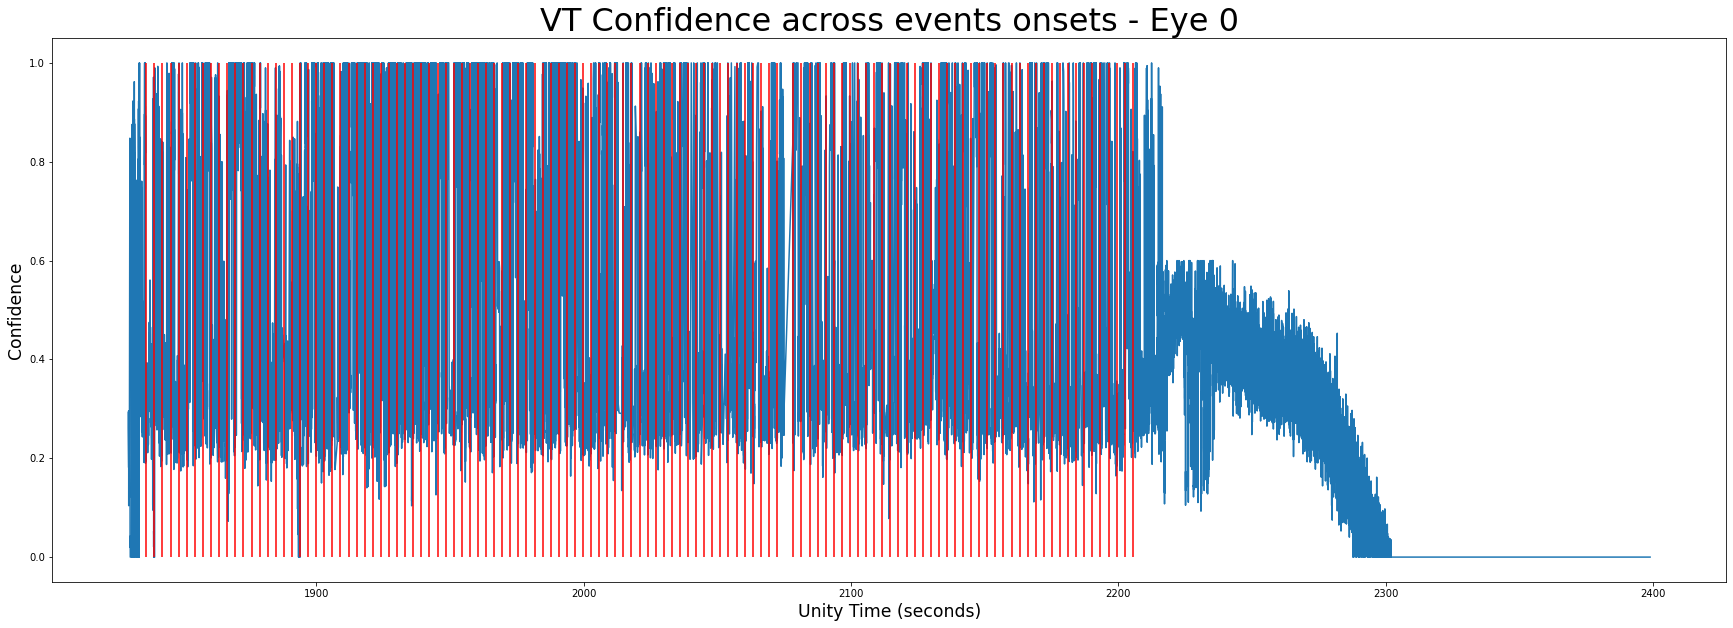

In [94]:
fig, ax = plt.subplots(figsize=(30,10))
ax.plot(gaze_dict['VT'][0]['unity_time'], gaze_dict['VT'][0]['confidence'])

# ax.plot(oa_eventsOnsets_series)
plt.xlabel('Unity Time (seconds)',fontsize='xx-large')
plt.ylabel('Confidence',fontsize='xx-large')


events = vt_events

plt.vlines(x=events,ymin=0,ymax=1,colors='red')
plt.title('VT Confidence across events onsets - Eye 0',fontsize=32)

plt.tick_params()
plt.show()

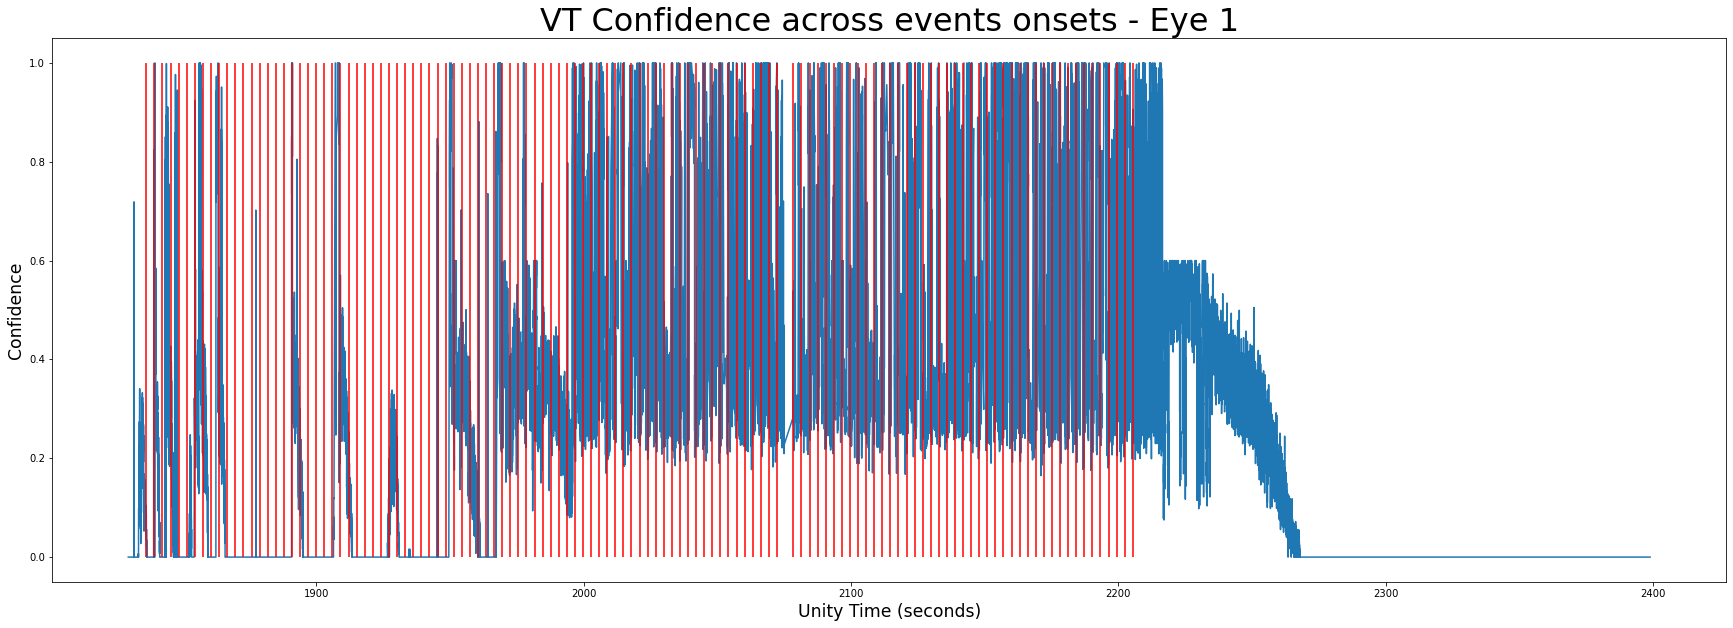

In [93]:
fig, ax = plt.subplots(figsize=(30,10))
ax.plot(gaze_dict['VT'][1]['unity_time'], gaze_dict['VT'][1]['confidence'])

# ax.plot(oa_eventsOnsets_series)
plt.xlabel('Unity Time (seconds)',fontsize='xx-large')
plt.ylabel('Confidence',fontsize='xx-large')


events = vt_events

plt.vlines(x=events,ymin=0,ymax=1,colors='red')
plt.title('VT Confidence across events onsets - Eye 1',fontsize=32)

plt.tick_params()
plt.show()

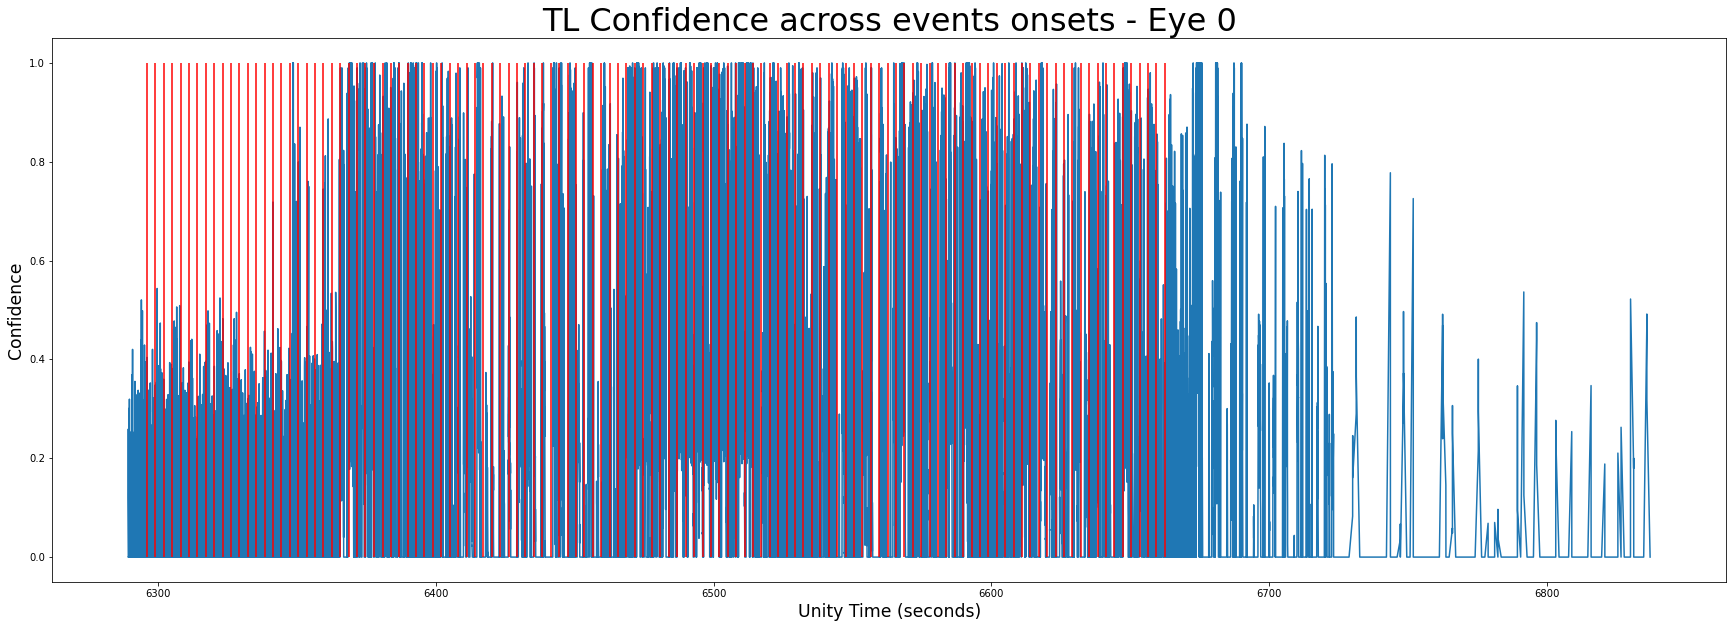

In [101]:
fig, ax = plt.subplots(figsize=(30,10))
ax.plot(gaze_dict['TL'][0]['unity_time'], gaze_dict['TL'][0]['confidence'])

# ax.plot(oa_eventsOnsets_series)
plt.xlabel('Unity Time (seconds)',fontsize='xx-large')
plt.ylabel('Confidence',fontsize='xx-large')


events = tl_events

plt.vlines(x=tl_events,ymin=0,ymax=1,colors='red')
plt.title('TL Confidence across events onsets - Eye 0',fontsize=32)

plt.tick_params()
plt.show()

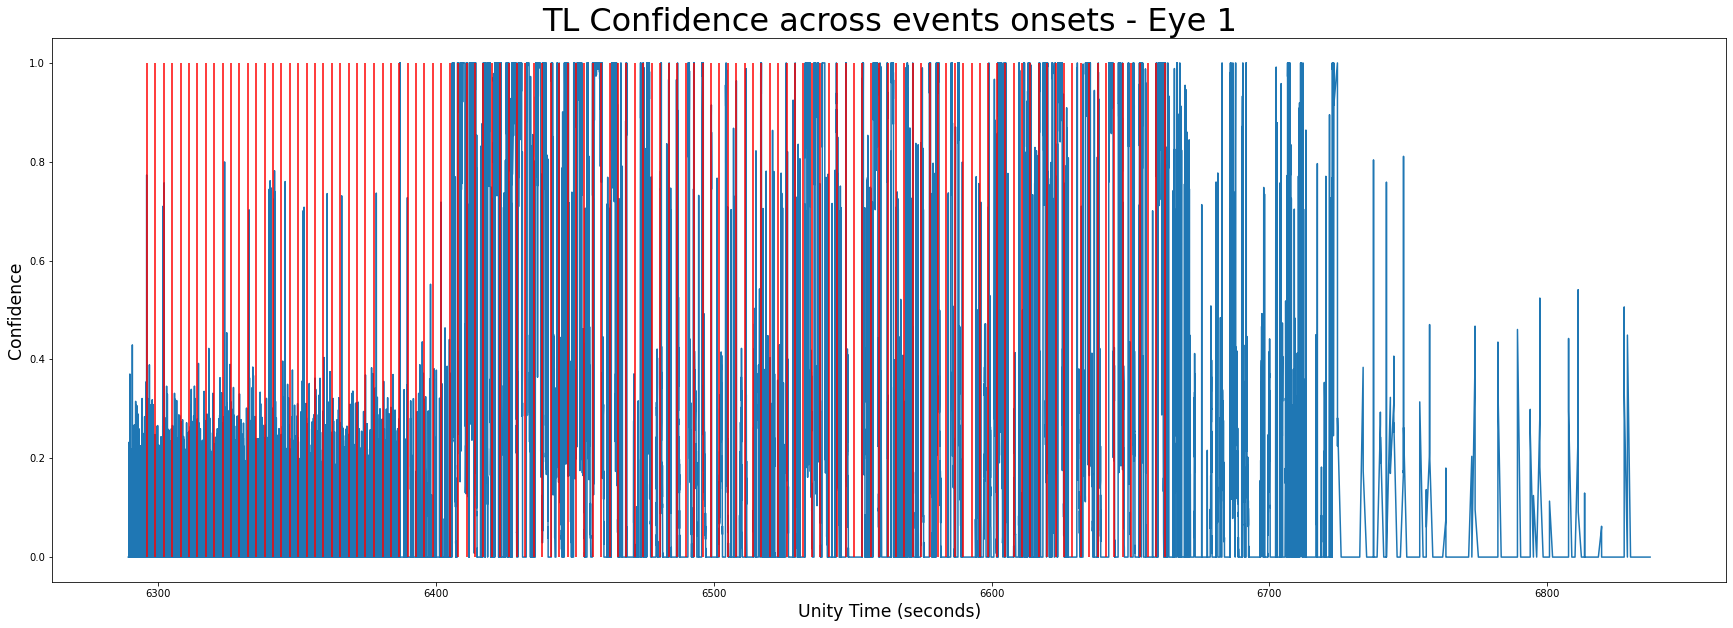

In [99]:
fig, ax = plt.subplots(figsize=(30,10))
ax.plot(gaze_dict['TL'][1]['unity_time'], gaze_dict['TL'][1]['confidence'])

# ax.plot(oa_eventsOnsets_series)
plt.xlabel('Unity Time (seconds)',fontsize='xx-large')
plt.ylabel('Confidence',fontsize='xx-large')


events = tl_events

plt.vlines(x=events,ymin=0,ymax=1,colors='red')
plt.title('TL Confidence across events onsets - Eye 1',fontsize=32)

plt.tick_params()
plt.show()

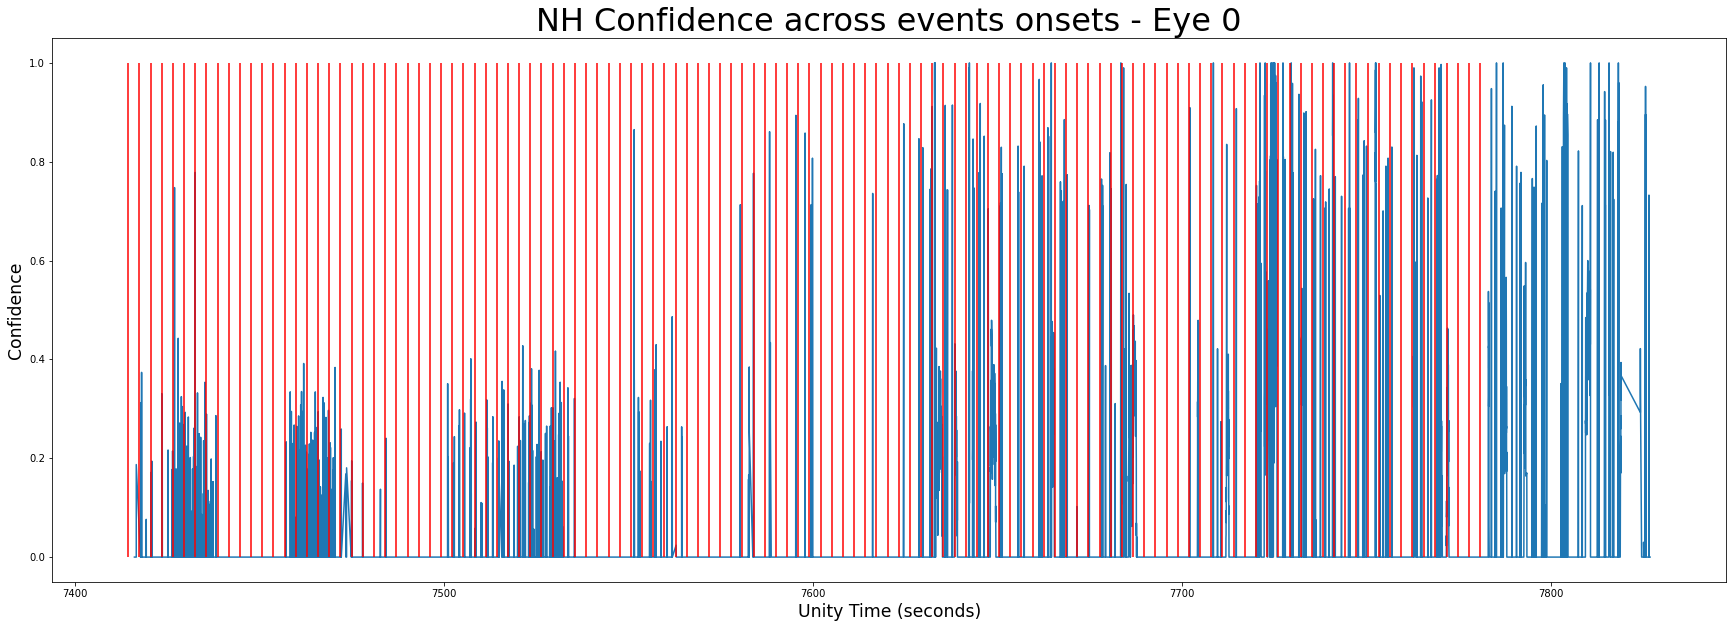

In [98]:
fig, ax = plt.subplots(figsize=(30,10))
ax.plot(gaze_dict['NH'][0]['unity_time'], gaze_dict['NH'][0]['confidence'])

# ax.plot(oa_eventsOnsets_series)
plt.xlabel('Unity Time (seconds)',fontsize='xx-large')
plt.ylabel('Confidence',fontsize='xx-large')


events = nc_events

plt.vlines(x=nh_events,ymin=0,ymax=1,colors='red')
plt.title('NH Confidence across events onsets - Eye 0',fontsize=32)

plt.tick_params()
plt.show()

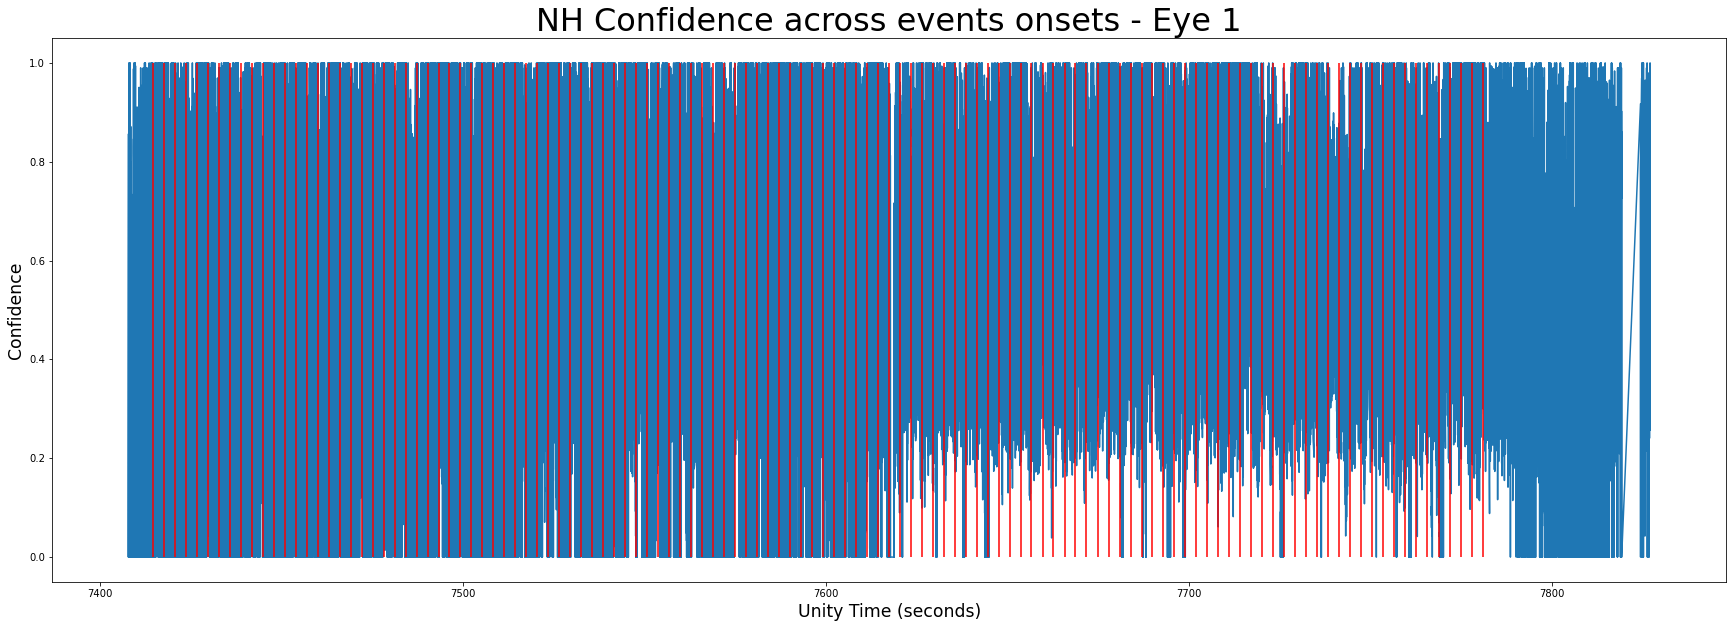

In [100]:
fig, ax = plt.subplots(figsize=(30,10))
ax.plot(gaze_dict['NH'][1]['unity_time'], gaze_dict['NH'][1]['confidence'])

# ax.plot(oa_eventsOnsets_series)
plt.xlabel('Unity Time (seconds)',fontsize='xx-large')
plt.ylabel('Confidence',fontsize='xx-large')


events = nh_events

plt.vlines(x=events,ymin=0,ymax=1,colors='red')
plt.title('NH Confidence across events onsets - Eye 1',fontsize=32)

plt.tick_params()
plt.show()

<AxesSubplot:>

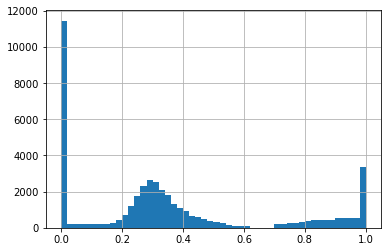

In [79]:
gaze_dict['VT'][0]['confidence'].hist(bins=50)

<AxesSubplot:>

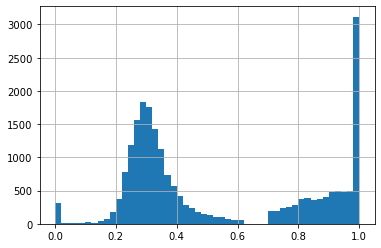

In [156]:
gaze_dict['VT'][0][gaze_dict['VT'][0]['unity_time']< vt_events[100]]['confidence'].hist(bins=50)

<AxesSubplot:>

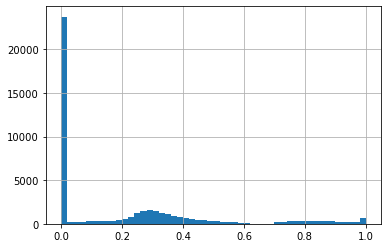

In [80]:
gaze_dict['VT'][1]['confidence'].hist(bins=50)

<AxesSubplot:>

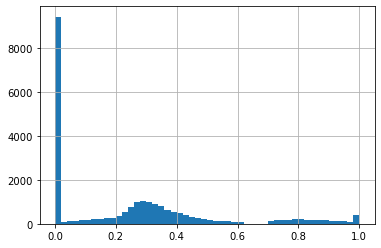

In [158]:
gaze_dict['VT'][1][gaze_dict['VT'][1]['unity_time']< vt_events[100]]['confidence'].hist(bins=50)

In [159]:
gaze_dict['VT'][0][gaze_dict['VT'][0]['unity_time']< vt_events[100]]['confidence'].describe()

count    21964.000000
mean         0.534599
std          0.304803
min          0.000000
25%          0.289876
50%          0.365588
75%          0.878629
max          1.000000
Name: confidence, dtype: float64

In [160]:
gaze_dict['VT'][1][gaze_dict['VT'][1]['unity_time']< vt_events[100]]['confidence'].describe()

count    23680.000000
mean         0.248845
std          0.274754
min          0.000000
25%          0.000000
50%          0.235618
75%          0.367225
max          1.000000
Name: confidence, dtype: float64

<AxesSubplot:>

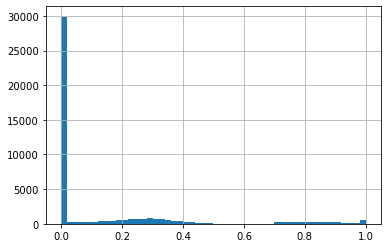

In [81]:
gaze_dict['TL'][0]['confidence'].hist(bins=50)

<AxesSubplot:>

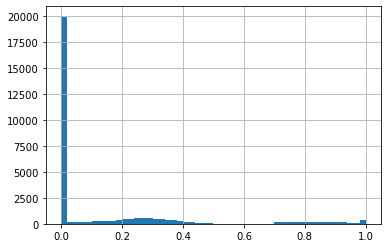

In [162]:
gaze_dict['TL'][0][gaze_dict['TL'][0]['unity_time']< tl_events[100]]['confidence'].hist(bins=50)

<AxesSubplot:>

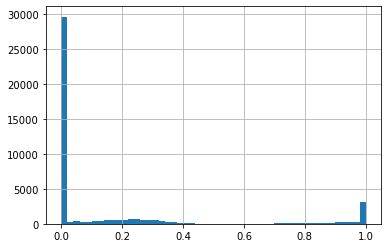

In [82]:
gaze_dict['TL'][1]['confidence'].hist(bins=50)

<AxesSubplot:>

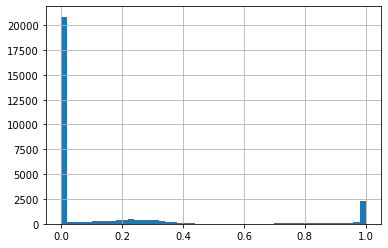

In [165]:
gaze_dict['TL'][1][gaze_dict['TL'][1]['unity_time']< tl_events[100]]['confidence'].hist(bins=50)

In [172]:
gaze_dict['TL'][0][gaze_dict['TL'][0]['unity_time']< tl_events[100]]['confidence'].describe()

count    30012.000000
mean         0.137707
std          0.253937
min          0.000000
25%          0.000000
50%          0.000000
75%          0.215795
max          1.000000
Name: confidence, dtype: float64

In [173]:
gaze_dict['TL'][1][gaze_dict['TL'][1]['unity_time']< tl_events[100]]['confidence'].describe()

count    30145.000000
mean         0.152087
std          0.306014
min          0.000000
25%          0.000000
50%          0.000000
75%          0.161162
max          1.000000
Name: confidence, dtype: float64

<AxesSubplot:>

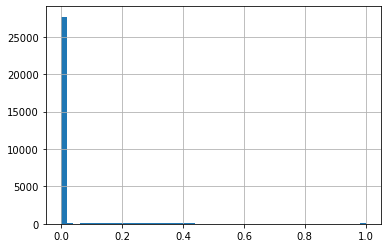

In [83]:
gaze_dict['NH'][0]['confidence'].hist(bins=50)

<AxesSubplot:>

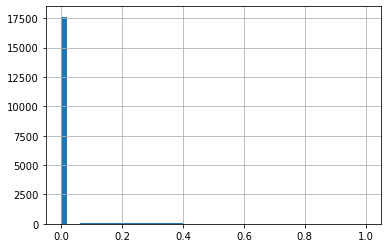

In [168]:
gaze_dict['NH'][0][gaze_dict['NH'][0]['unity_time']< nh_events[100]]['confidence'].hist(bins=50)

<AxesSubplot:>

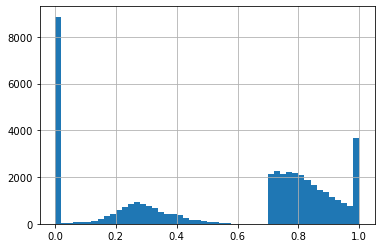

In [84]:
gaze_dict['NH'][1]['confidence'].hist(bins=50)

<AxesSubplot:>

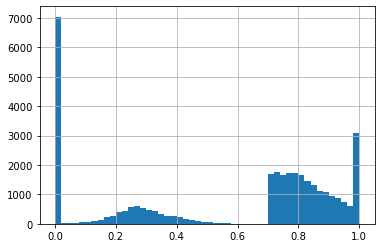

In [169]:
gaze_dict['NH'][1][gaze_dict['NH'][1]['unity_time']< nh_events[100]]['confidence'].hist(bins=50)

In [170]:
gaze_dict['NH'][0][gaze_dict['NH'][0]['unity_time']< nh_events[100]]['confidence'].describe()

count    18848.000000
mean         0.017907
std          0.082430
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: confidence, dtype: float64

In [171]:
gaze_dict['NH'][1][gaze_dict['NH'][1]['unity_time']< nh_events[100]]['confidence'].describe()

count    34464.000000
mean         0.573669
std          0.365208
min          0.000000
25%          0.231058
50%          0.748413
75%          0.857165
max          1.000000
Name: confidence, dtype: float64

<AxesSubplot:>

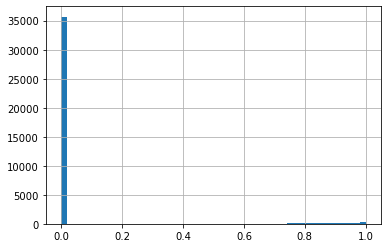

In [53]:
oa_ODgaze_df['confidence'].hist(bins=50)

In [42]:
oa_ODgaze_df['confidence'].describe()

count    37408.000000
mean         0.041153
std          0.187852
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: confidence, dtype: float64

<AxesSubplot:>

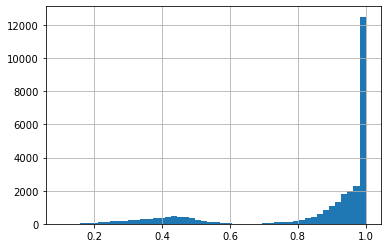

In [52]:
oa_OSgaze_df['confidence'].hist(bins=50)

In [54]:
oa_OSgaze_df['confidence'].describe()

count    29374.000000
mean         0.856752
std          0.225022
min          0.103147
25%          0.866486
50%          0.964833
75%          1.000000
max          1.000000
Name: confidence, dtype: float64

<AxesSubplot:>

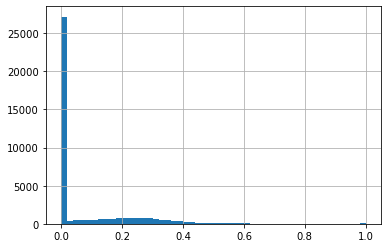

In [67]:
sg_ODgaze_df['confidence'].hist(bins=50)

In [163]:
sg_ODgaze_df['confidence'].describe()

count    39187.000000
mean         0.075436
std          0.138910
min          0.000000
25%          0.000000
50%          0.000000
75%          0.116395
max          1.000000
Name: confidence, dtype: float64

<AxesSubplot:>

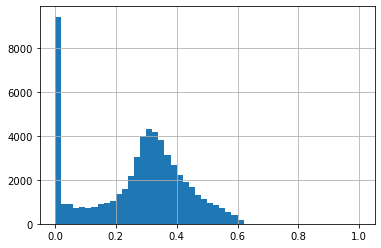

In [46]:
nc_ODgaze_df['confidence'].hist(bins=50)

In [44]:
nc_ODgaze_df['confidence'].describe()

count    59195.000000
mean         0.269900
std          0.163455
min          0.000000
25%          0.153917
50%          0.301852
75%          0.378938
max          1.000000
Name: confidence, dtype: float64

<AxesSubplot:>

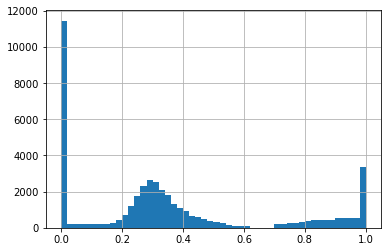

In [47]:
vt_ODgaze_df['confidence'].hist(bins=50)

In [48]:
vt_ODgaze_df['confidence'].describe()

count    44008.000000
mean         0.353810
std          0.322276
min          0.000000
25%          0.000000
50%          0.298590
75%          0.452683
max          1.000000
Name: confidence, dtype: float64

<AxesSubplot:>

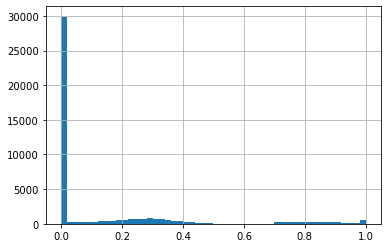

In [50]:
tl_ODgaze_df['confidence'].hist(bins=50)

In [51]:
tl_ODgaze_df['confidence'].describe()

count    43501.000000
mean         0.126645
std          0.244475
min          0.000000
25%          0.000000
50%          0.000000
75%          0.189085
max          1.000000
Name: confidence, dtype: float64

<AxesSubplot:>

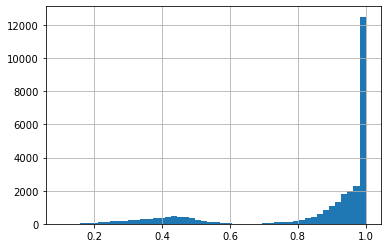

In [73]:
oa_OSgaze_df['confidence'].hist(bins=50)

In [134]:
oa_OSgaze_df['confidence'].describe()

count    29374.000000
mean         0.856752
std          0.225022
min          0.103147
25%          0.866486
50%          0.964833
75%          1.000000
max          1.000000
Name: confidence, dtype: float64

<AxesSubplot:>

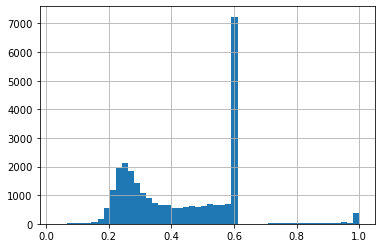

In [74]:
sg_OSgaze_df['confidence'].hist(bins=50)

In [114]:
sg_OSgaze_df['confidence'].describe()

count    27641.000000
mean         0.428004
std          0.171635
min          0.028172
25%          0.269057
50%          0.410919
75%          0.600000
max          1.000000
Name: confidence, dtype: float64

In [116]:
len(sg_OSgaze_df[sg_OSgaze_df['confidence'] >= 0.6])

7698

In [117]:
len(sg_OSgaze_df[sg_OSgaze_df['confidence'] >= 0.6])/len(sg_OSgaze_df['confidence'])

0.2784993307043884

In [118]:
len(sg_ODgaze_df[sg_ODgaze_df['confidence'] >= 0.6])/len(sg_ODgaze_df['confidence'])

0.007349376068594177

In [ ]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [59]:
from matplotlib.font_manager import FontProperties

In [157]:
fprop = FontProperties()
fprop.set_size(size='x-large')

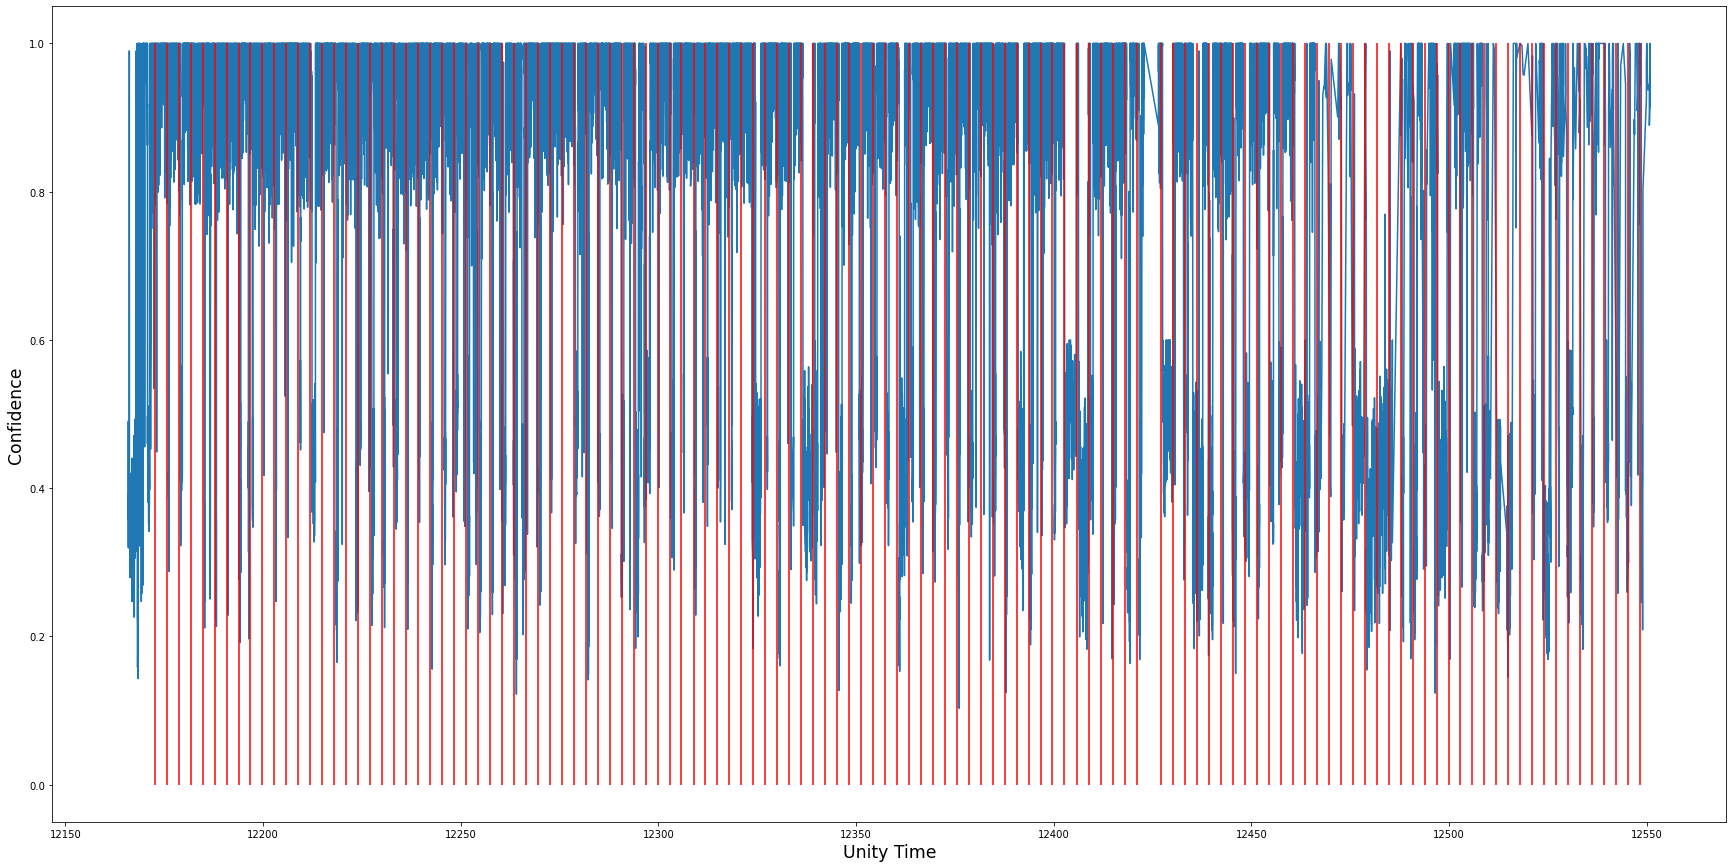

In [321]:
fig, ax = plt.subplots(figsize=(30,15))
ax.plot(oa_OSgaze_df['unity_time'], oa_OSgaze_df['confidence'])

fprop = FontProperties()
fprop.set_size(size='x-large')

# ax.plot(oa_eventsOnsets_series)
plt.xlabel('Unity Time',fontsize='xx-large')
plt.ylabel('Confidence',fontsize='xx-large')


events = oa_eventsOnsets_series

plt.vlines(x=events,ymin=0,ymax=1,colors='red')
# ax.set_xticklabels(events,rotation=45,fontproperties=fprop)
plt.tick_params()
plt.show()

In [313]:
oa_eventsOnsets_series

0      12172.630732
1      12175.657383
2      12178.682930
3      12181.702447
4      12184.716469
           ...     
119    12536.151633
120    12539.177967
121    12542.205479
122    12545.232981
123    12548.258875
Name: unity_time, Length: 124, dtype: float64

In [279]:
16*3

48

In [121]:
sg_OSgaze_df.head()

confidence  GazeDirection_x  GazeDirection_y  GazeDirection_z  \
1    0.179533         0.030080        -0.413459         0.910026   
2    0.316559        -0.011459        -0.362201         0.932029   
4    0.369825        -0.017714        -0.346956         0.937714   
7    0.272743         0.103512        -0.306509         0.946223   
9    0.358590         0.132197        -0.179136         0.974902   

   GazeDistance   timestamp  norm_pos_x  norm_pos_y  EyeCenter0_x  \
1      0.492308  241.072553    0.521470    0.106532           0.0   
2      0.493900  241.083960    0.492014    0.163449           0.0   
4      0.494187  241.090333    0.487730    0.179569           0.0   
7      0.490684  241.097469    0.571054    0.219469           0.0   
9      0.490616  241.106692    0.588075    0.340870           0.0   

   EyeCenter0_y  ...  eyes_dir_hit_x  eyes_dir_hit_y  eyes_dir_hit_z  \
1           0.0  ...            -100            -100            -100   
2           0.0  ...            -100            -100            -100   
4           0.0  ...            -100            -100            -100   
7           0.0  ...            -100            -100            -100   
9           0.0  ...            -100            -100            -100   

   eyes_to_surface_distance  eyes_to_surface_angle  eyes_dir_name  \
1                      -100                   -100           -100   
2                      -100                   -100           -100   
4                      -100                   -100           -100   
7                      -100                   -100           -100   
9                      -100                   -100           -100   

    unity_time  TimeSinceStart        EyeID  Unnamed: 29  
1  3550.082645        241.2625  Monocular_1          NaN  
2  3550.082778        241.2639  Monocular_1          NaN  
4  3550.083117        241.2673  Monocular_1          NaN  
7  3550.083511        241.2712  Monocular_1          NaN  
9  3550.083769        241.2738  Monocular_1          NaN  

[5 rows x 30 columns]

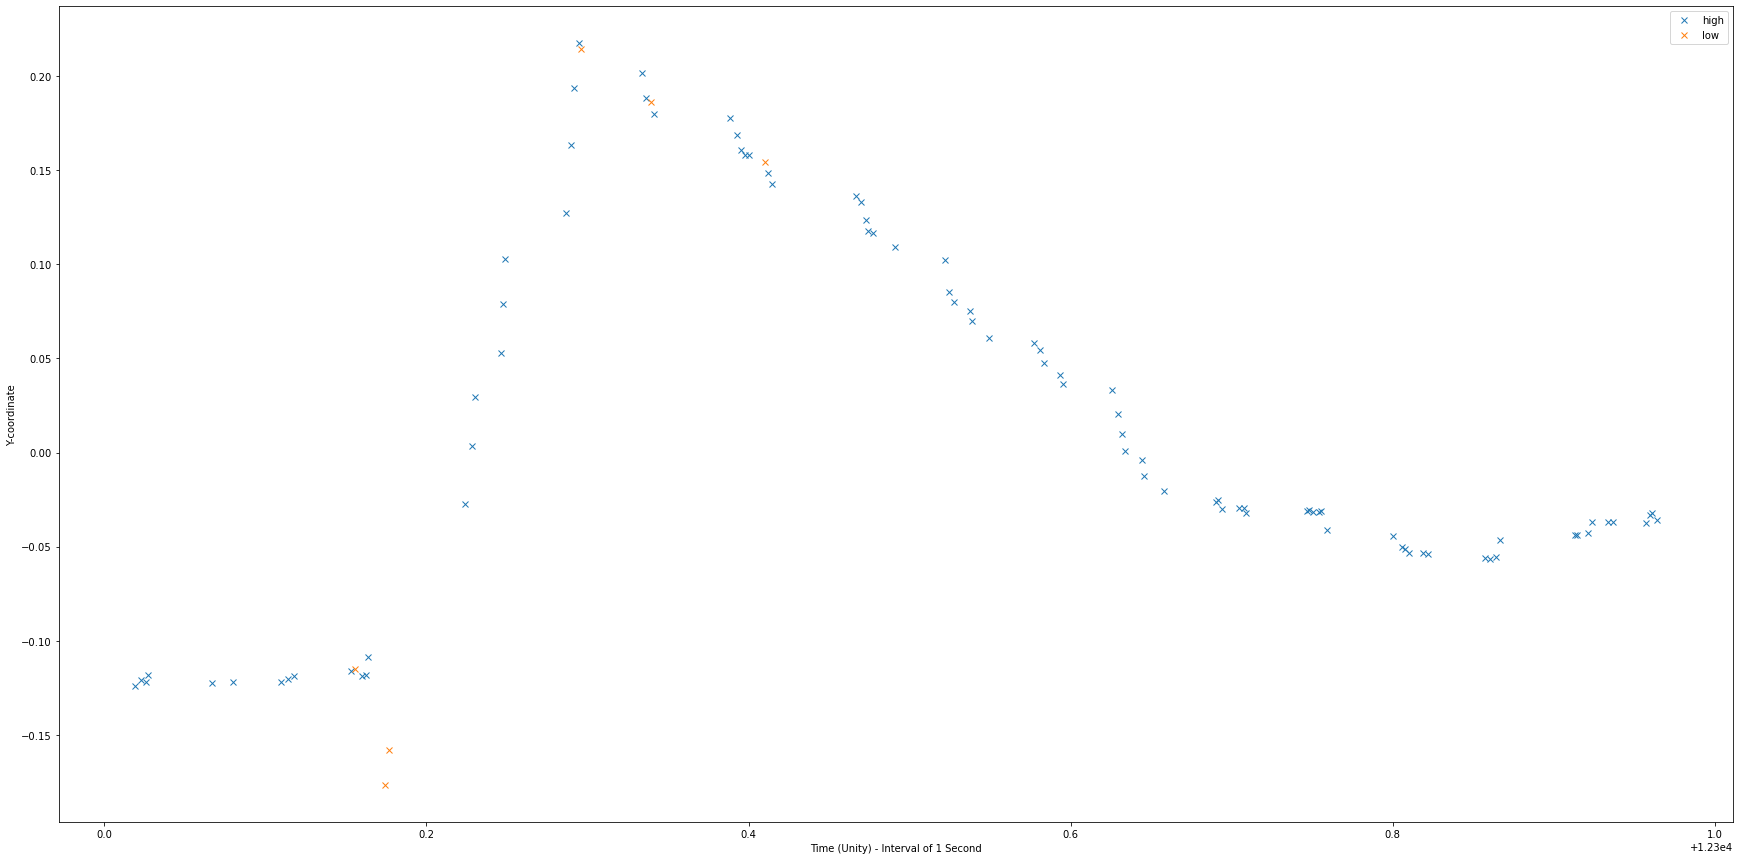

In [315]:
fig, ax = plt.subplots(figsize=(30,15))
_slice_high = oa_OSgaze_df[(oa_OSgaze_df['confidence'] >= .80) & (oa_OSgaze_df['unity_time']>=12300) & (oa_OSgaze_df['unity_time'] < 12301)]
ax.plot(_slice_high['unity_time'],_slice_high['GazeDirection_y'],'x')
_slice_low = oa_OSgaze_df[(oa_OSgaze_df['confidence'] < .80) & (oa_OSgaze_df['unity_time']>=12300) & (oa_OSgaze_df['unity_time'] < 12301)]
ax.plot(_slice_low['unity_time'],_slice_low['GazeDirection_y'],'x')
ax.set_xlabel('Time (Unity) - Interval of 1 Second')
ax.set_ylabel('Y-coordinate')
ax.legend(['high','low'])
plt.show()

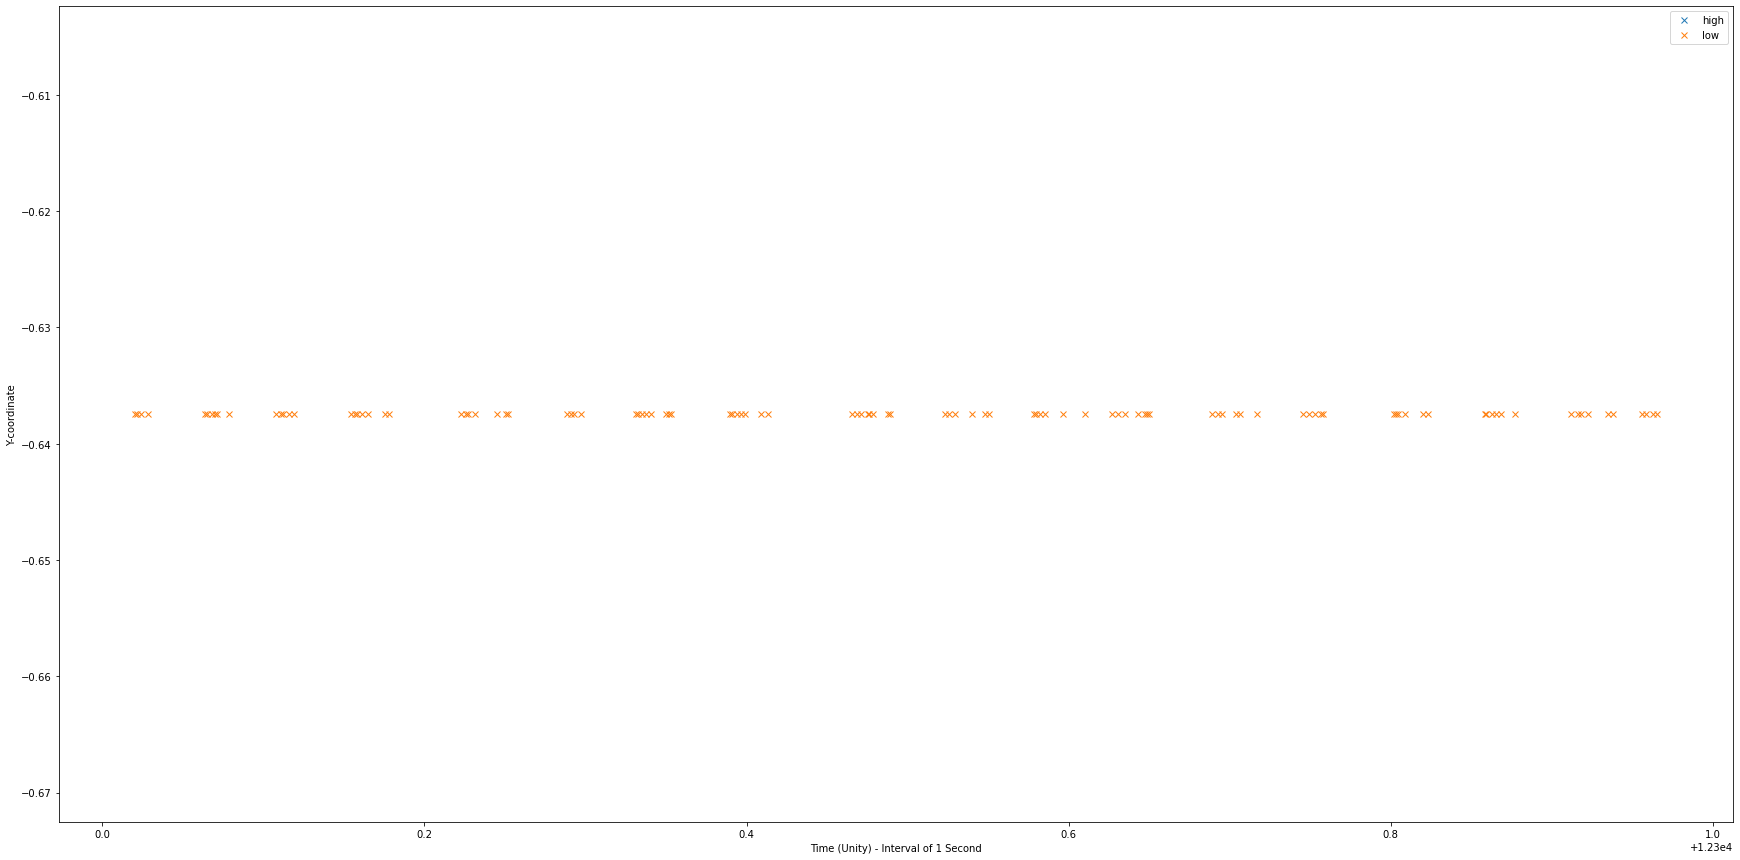

In [316]:
fig, ax = plt.subplots(figsize=(30,15))
_slice_high = oa_ODgaze_df[(oa_ODgaze_df['confidence'] >= .80) & (oa_ODgaze_df['unity_time']>=12300) & (oa_ODgaze_df['unity_time'] < 12301)]
ax.plot(_slice_high['unity_time'],_slice_high['GazeDirection_y'],'x')
_slice_low = oa_ODgaze_df[(oa_ODgaze_df['confidence'] < .80) & (oa_ODgaze_df['unity_time']>=12300) & (oa_ODgaze_df['unity_time'] < 12301)]
ax.plot(_slice_low['unity_time'],_slice_low['GazeDirection_y'],'x')
ax.set_xlabel('Time (Unity) - Interval of 1 Second')
ax.set_ylabel('Y-coordinate')
ax.legend(['high','low'])
plt.show()

In [183]:
_slice_low['confidence'].describe()

count    1106.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: confidence, dtype: float64

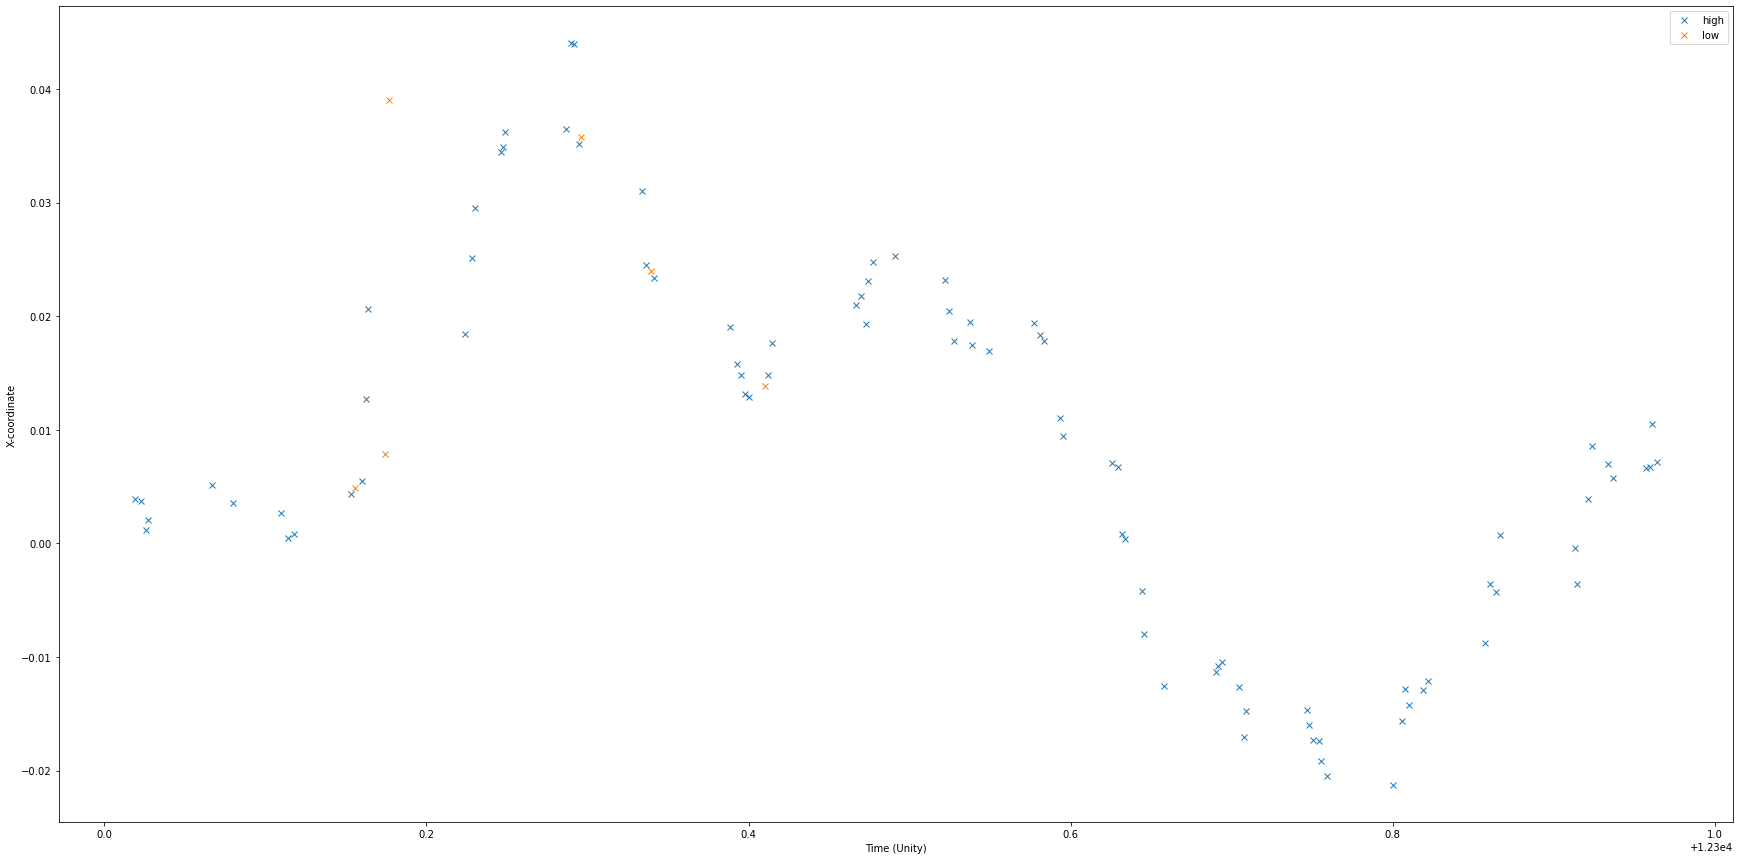

In [317]:
fig, ax = plt.subplots(figsize=(30,15))
_slice_high = oa_OSgaze_df[(oa_OSgaze_df['confidence'] >= .80) & (oa_OSgaze_df['unity_time']>=12300) & (oa_OSgaze_df['unity_time'] < 12301)]
ax.plot(_slice_high['unity_time'],_slice_high['GazeDirection_x'],'x')
_slice_low = oa_OSgaze_df[(oa_OSgaze_df['confidence'] < .80) & (oa_OSgaze_df['unity_time']>=12300) & (oa_OSgaze_df['unity_time'] < 12301)]
ax.plot(_slice_low['unity_time'],_slice_low['GazeDirection_x'],'x')
ax.set_xlabel('Time (Unity)')
ax.set_ylabel('X-coordinate')
ax.legend(['high','low'])
plt.show()

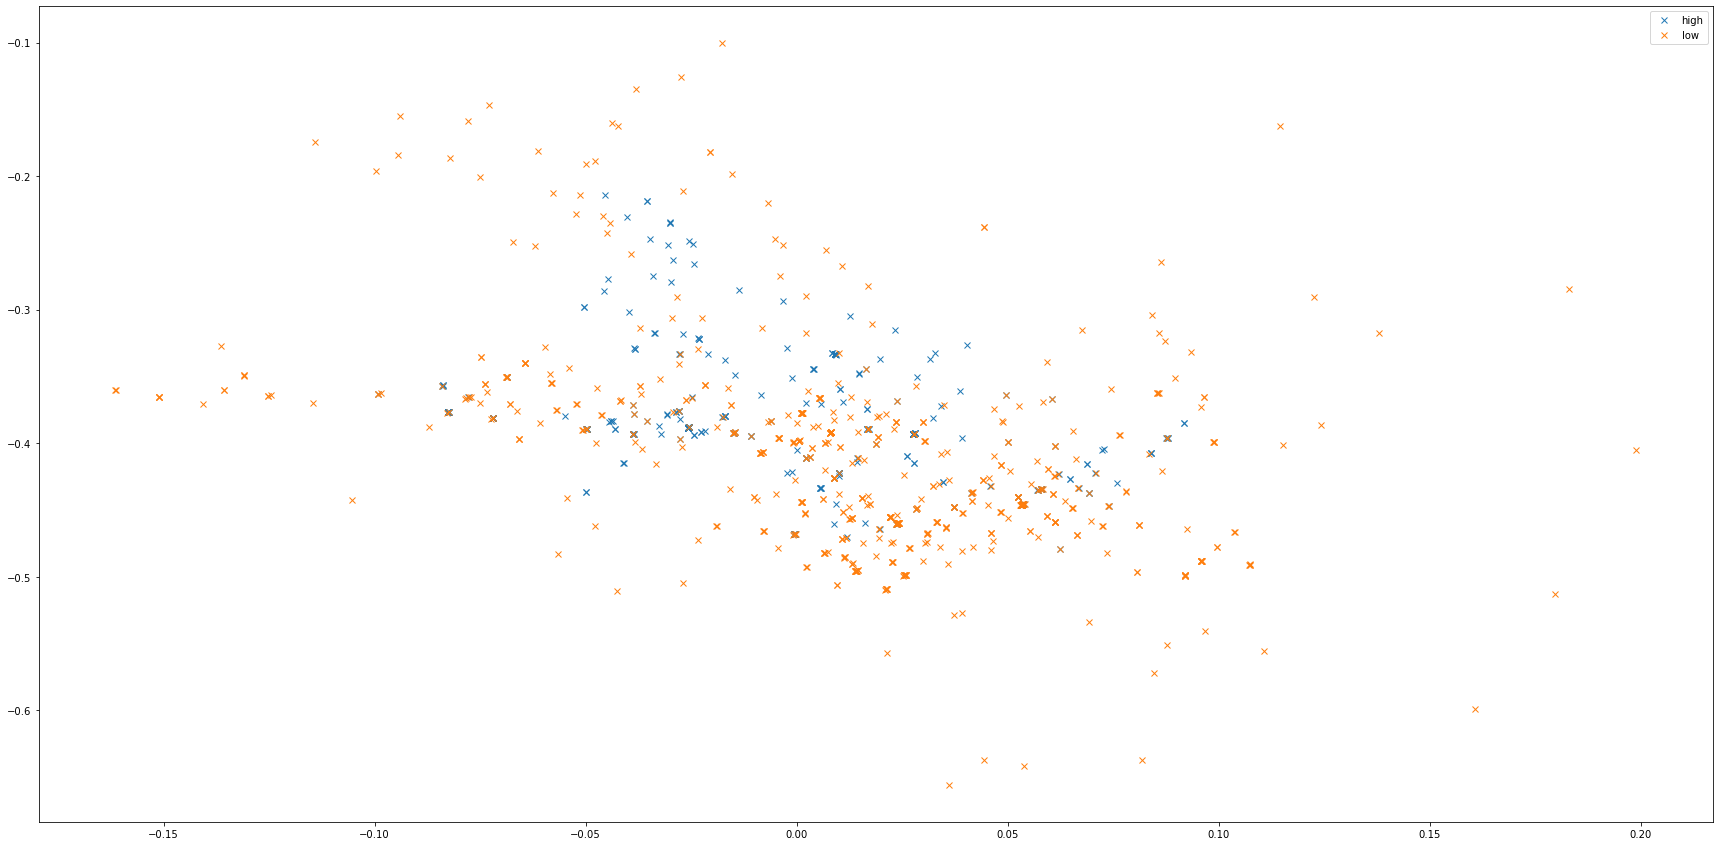

In [129]:
fig, ax = plt.subplots(figsize=(30,15))
_slice_high = sg_OSgaze_df[(sg_OSgaze_df['confidence'] >= .60) & (sg_OSgaze_df['unity_time']>=3555) & (sg_OSgaze_df['unity_time'] < 3556)]
ax.plot(_slice_high['GazeDirection_x'],_slice_high['GazeDirection_y'],'x')
_slice_low = sg_OSgaze_df[(sg_OSgaze_df['confidence'] < .60) & (sg_OSgaze_df['unity_time']>=3555) & (sg_OSgaze_df['unity_time'] < 3556)]
ax.plot(_slice_low['GazeDirection_x'],_slice_low['GazeDirection_y'],'x')
ax.legend(['high','low'])
plt.show()

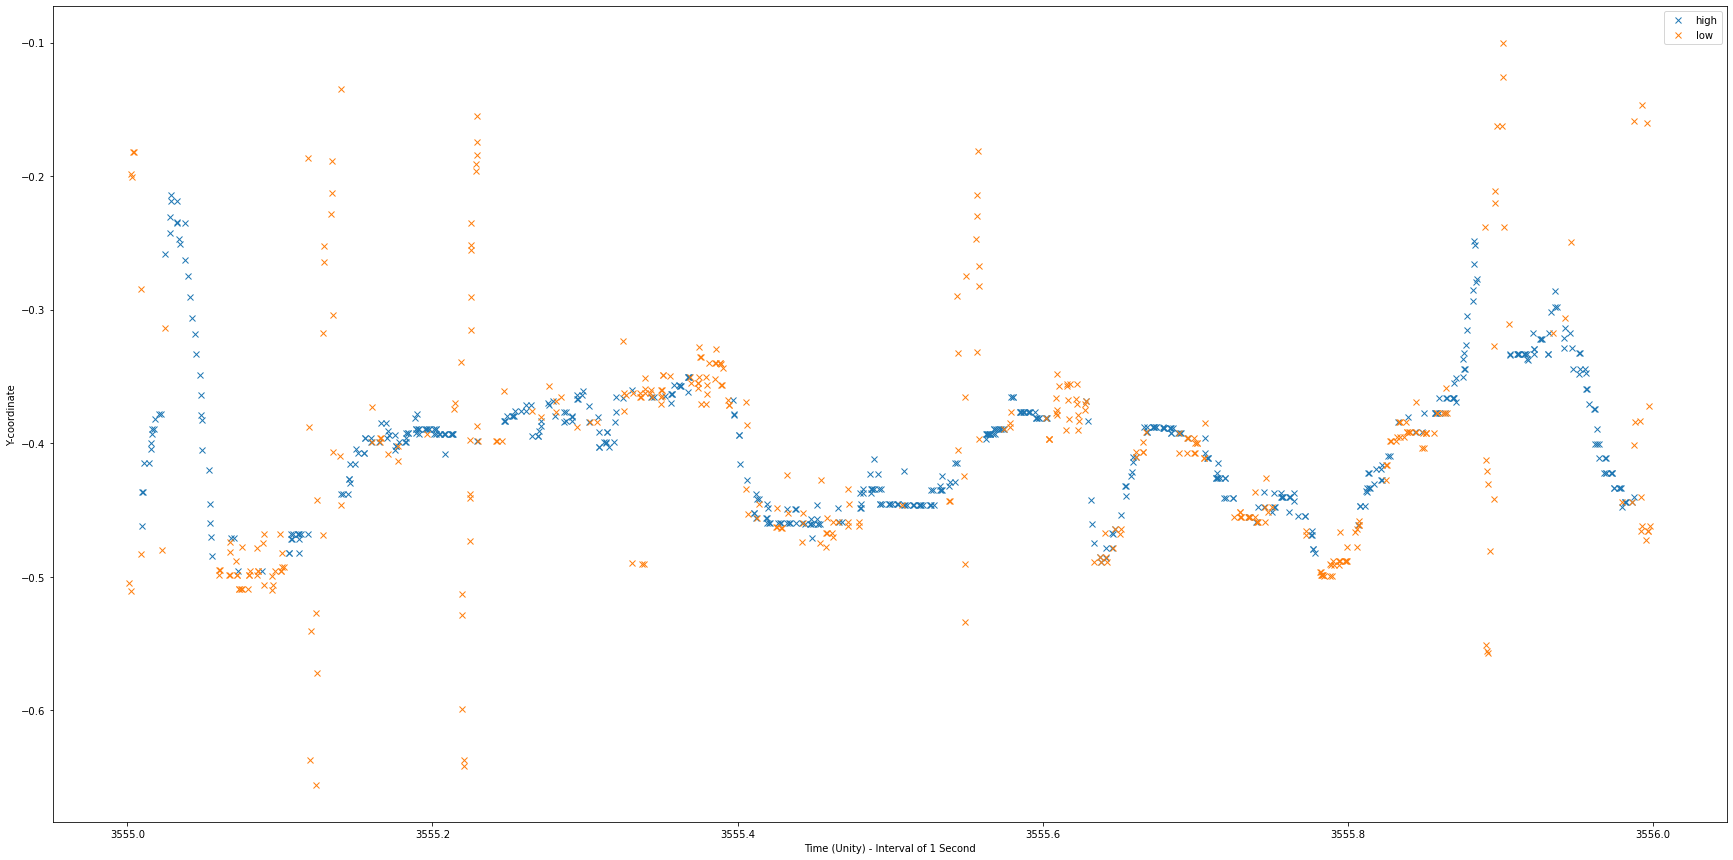

In [177]:
fig, ax = plt.subplots(figsize=(30,15))
_slice_high = sg_OSgaze_df[(sg_OSgaze_df['confidence'] >= .50) & (sg_OSgaze_df['unity_time']>=3555) & (sg_OSgaze_df['unity_time'] < 3556)]
ax.plot(_slice_high['unity_time'],_slice_high['GazeDirection_y'],'x')
_slice_low = sg_OSgaze_df[(sg_OSgaze_df['confidence'] < .50) & (sg_OSgaze_df['unity_time']>=3555) & (sg_OSgaze_df['unity_time'] < 3556)]
ax.plot(_slice_low['unity_time'],_slice_low['GazeDirection_y'],'x')
ax.set_xlabel('Time (Unity) - Interval of 1 Second')
ax.set_ylabel('Y-coordinate')
ax.legend(['high','low'])
plt.show()

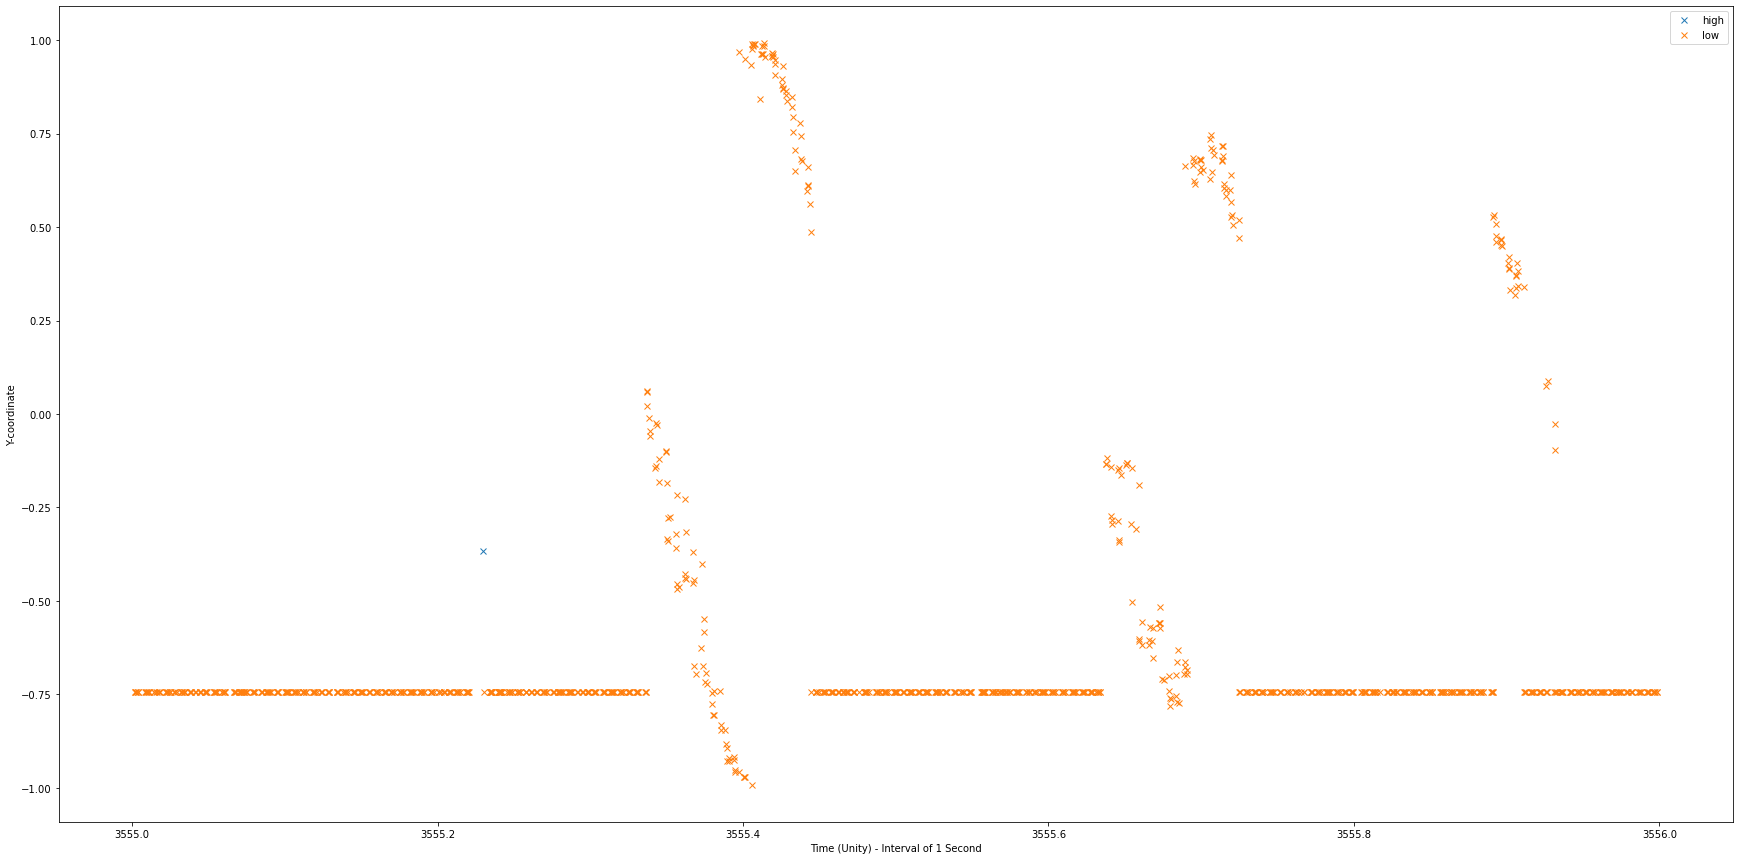

In [178]:
fig, ax = plt.subplots(figsize=(30,15))
_slice_high = sg_ODgaze_df[(sg_ODgaze_df['confidence'] >= .50) & (sg_ODgaze_df['unity_time']>=3555) & (sg_ODgaze_df['unity_time'] < 3556)]
ax.plot(_slice_high['unity_time'],_slice_high['GazeDirection_y'],'x')
_slice_low = sg_ODgaze_df[(sg_ODgaze_df['confidence'] < .50) & (sg_ODgaze_df['unity_time']>=3555) & (sg_ODgaze_df['unity_time'] < 3556)]
ax.plot(_slice_low['unity_time'],_slice_low['GazeDirection_y'],'x')
ax.set_xlabel('Time (Unity) - Interval of 1 Second')
ax.set_ylabel('Y-coordinate')
ax.legend(['high','low'])
plt.show()

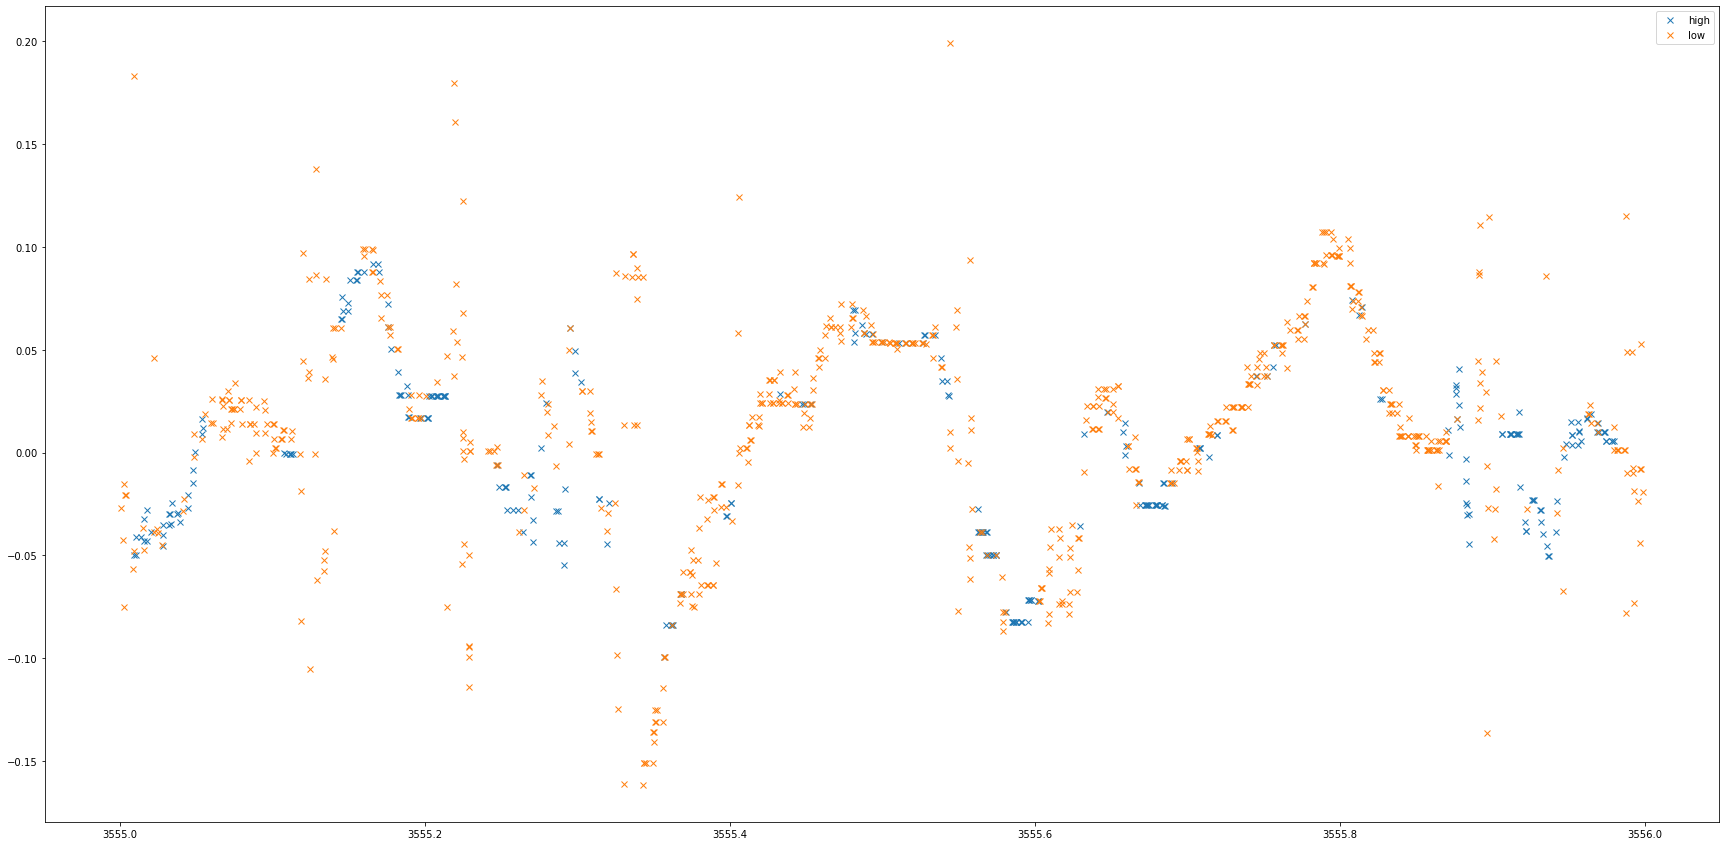

In [131]:
fig, ax = plt.subplots(figsize=(30,15))
_slice_high = sg_OSgaze_df[(sg_OSgaze_df['confidence'] >= .60) & (sg_OSgaze_df['unity_time']>=35505) & (sg_OSgaze_df['unity_time'] < 35506)]
ax.plot(_slice_high['unity_time'],_slice_high['GazeDirection_x'],'x')
_slice_low = sg_OSgaze_df[(sg_OSgaze_df['confidence'] < .60) & (sg_OSgaze_df['unity_time']>=35505) & (sg_OSgaze_df['unity_time'] < 3556)]
ax.plot(_slice_low['unity_time'],_slice_low['GazeDirection_x'],'x')
ax.legend(['high','low'])
plt.show()

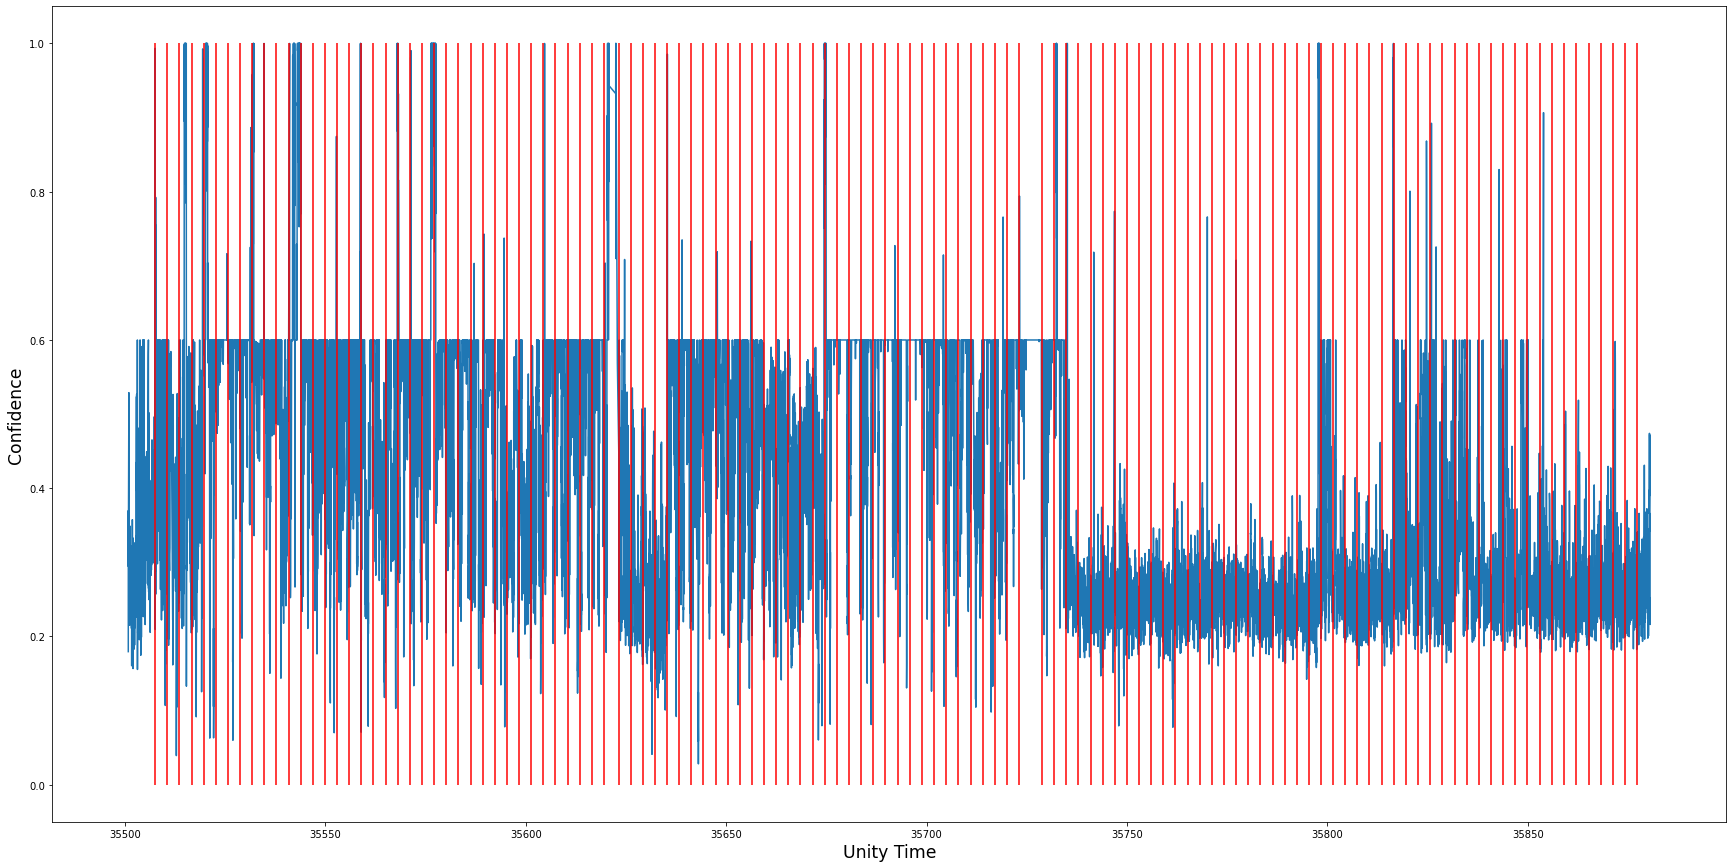

In [318]:
fig, ax = plt.subplots(figsize=(30,15))
ax.plot(sg_OSgaze_df['unity_time'], sg_OSgaze_df['confidence'])
# fprop = FontProperties(),
# fprop.set_size(size='x-large')
# ax.plot(oa_eventsOnsets_series)
plt.xlabel('Unity Time',fontsize='xx-large')
plt.ylabel('Confidence',fontsize='xx-large')
events = sg_eventsOnsets_series
plt.vlines(x=events,ymin=0,ymax=1,colors='red')
# ax.set_xticklabels(events,rotation=45,fontproperties=fprop)
plt.tick_params()
plt.show()

In [14]:
def euc2d(a,b):
    return np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)

In [231]:
len(oa_OSgaze_df)

29374

In [322]:
oa_OSdistances = []
for ix in range(1,len(oa_OSgaze_df)):
    oa_OSdistances.append(euc2d(oa_OSgaze_df.iloc[ix][['GazeDirection_x','GazeDirection_y']],oa_OSgaze_df.iloc[ix-1][['GazeDirection_x','GazeDirection_y']]))

In [237]:
len(oa_OSdistances)

29373

In [239]:
pd.Series(oa_OSdistances)

0        0.000119
1        0.140656
2        0.102224
3        0.064843
4        0.041959
           ...   
29368    0.004041
29369    0.005916
29370    0.003087
29371    0.002878
29372    0.003679
Length: 29373, dtype: float64

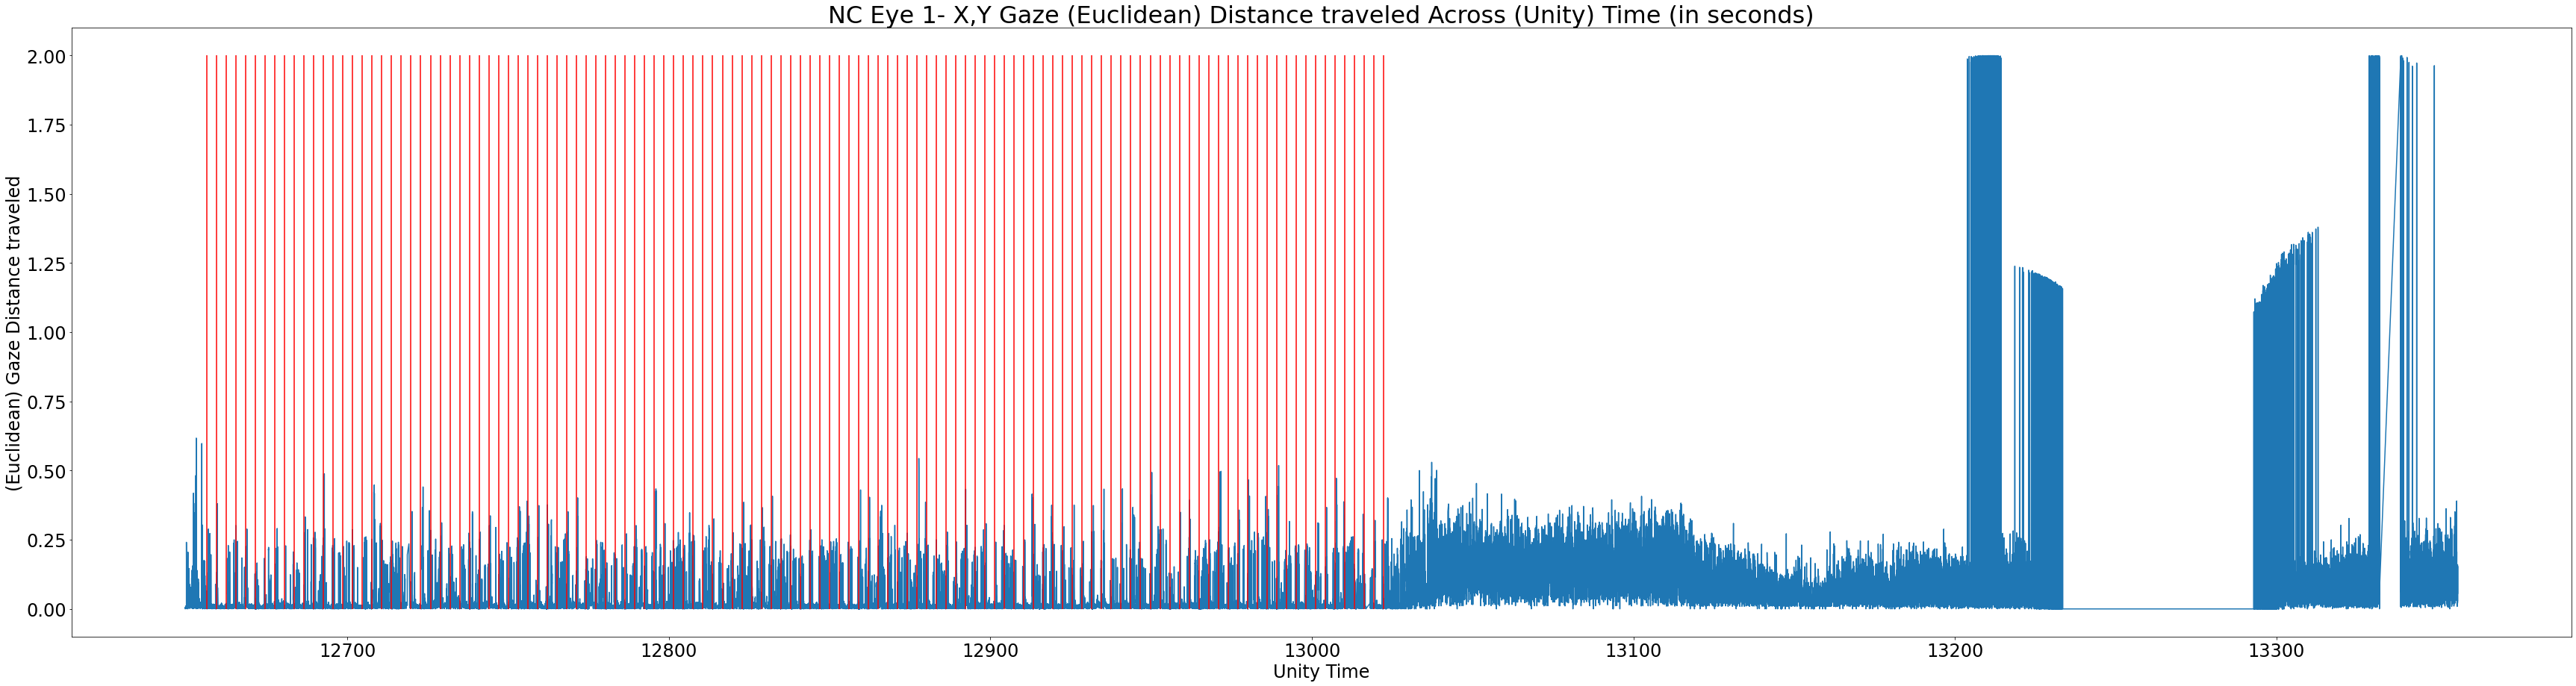

In [128]:
_gaze_df = gaze_dict['NC'][1]

nc_ODdistances = []

for ix in range(1,len(_gaze_df)):
    nc_ODdistances.append(euc2d(_gaze_df.iloc[ix][['GazeDirection_x','GazeDirection_y']],_gaze_df.iloc[ix-1][['GazeDirection_x','GazeDirection_y']]))

fig, ax = plt.subplots(figsize=(60,15))
ax.plot(_gaze_df['unity_time'][1:], pd.Series(nc_ODdistances))
# fprop = FontProperties(),
# fprop.set_size(size='x-large')
# ax.plot(oa_eventsOnsets_series)
plt.xlabel('Unity Time',fontsize=24)
plt.ylabel('(Euclidean) Gaze Distance traveled',fontsize=24)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.title('NC Eye 1- X,Y Gaze (Euclidean) Distance traveled Across (Unity) Time (in seconds)',fontsize=32)

events = nc_events
plt.vlines(x=events,ymin=0,ymax=max(nc_ODdistances),colors='red')
# ax.set_xticklabels(events,rotation=45,fontproperties=fprop)
plt.tick_params()
plt.show()

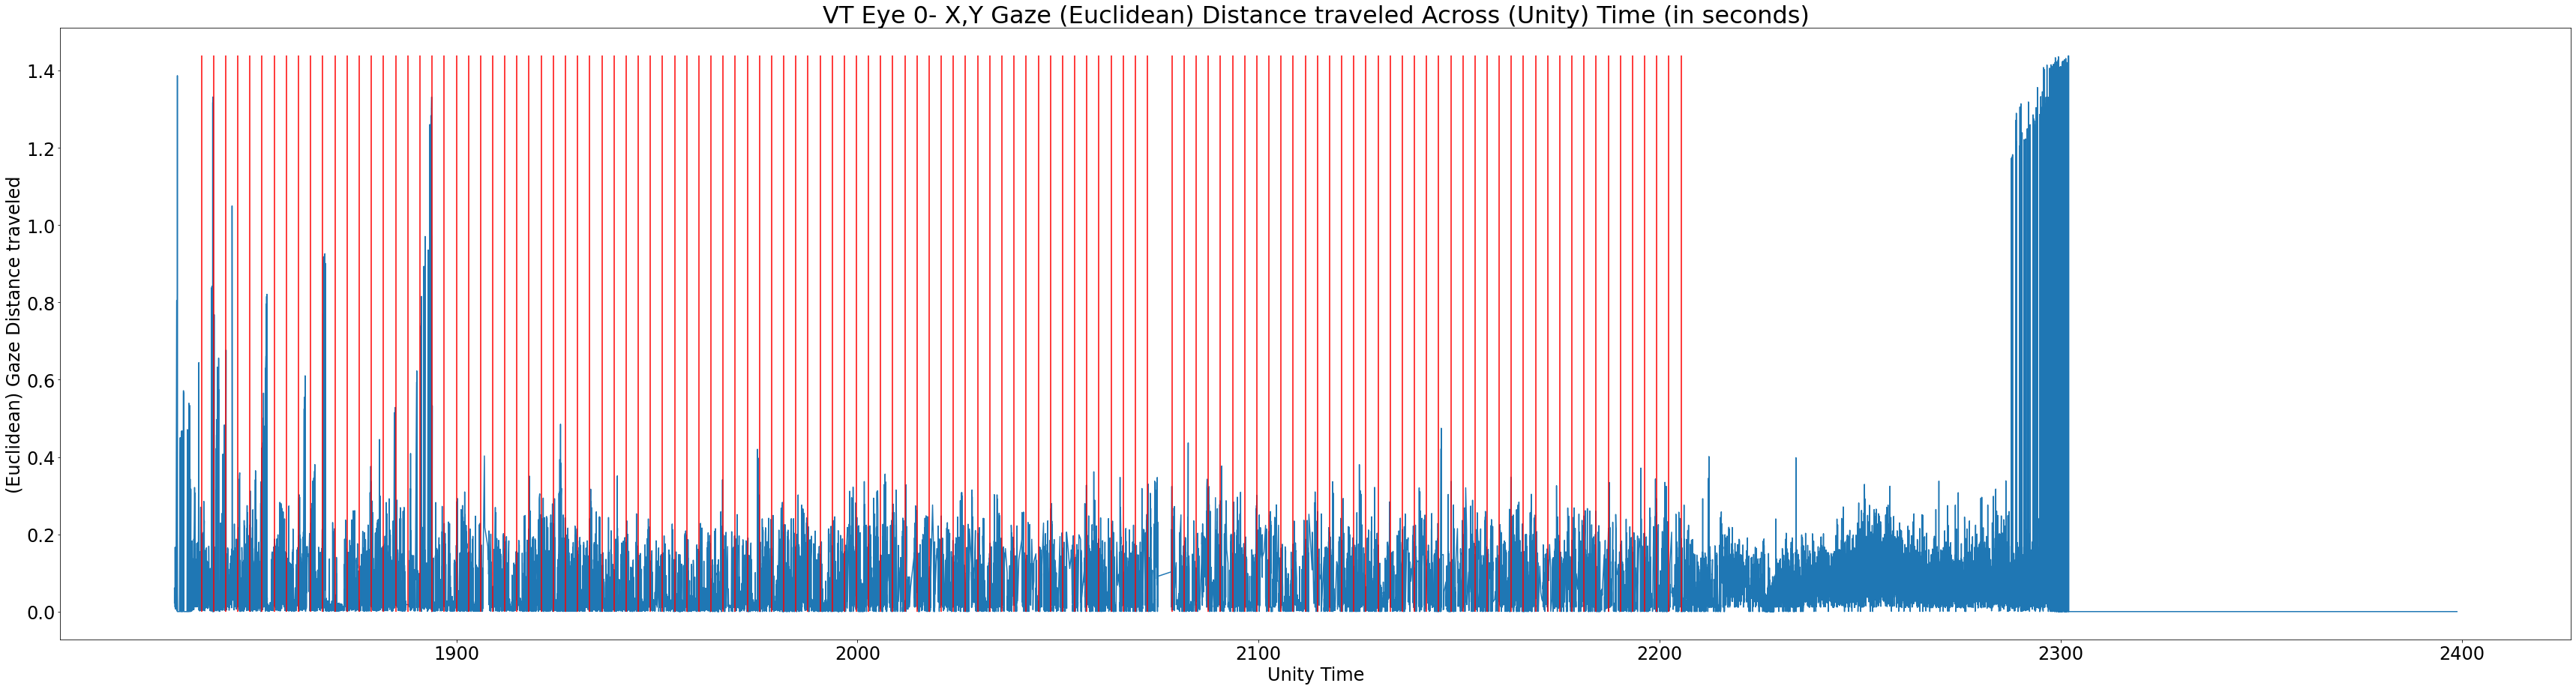

In [130]:
_gaze_df = gaze_dict['VT'][0]

_events = vt_events

vt_OSdistances = []

for ix in range(1,len(_gaze_df)):
    vt_OSdistances.append(euc2d(_gaze_df.iloc[ix][['GazeDirection_x','GazeDirection_y']],_gaze_df.iloc[ix-1][['GazeDirection_x','GazeDirection_y']]))

_distances = vt_OSdistances 

fig, ax = plt.subplots(figsize=(60,15))
ax.plot(_gaze_df['unity_time'][1:], pd.Series(_distances))
# fprop = FontProperties(),
# fprop.set_size(size='x-large')
# ax.plot(oa_eventsOnsets_series)
plt.xlabel('Unity Time',fontsize=24)
plt.ylabel('(Euclidean) Gaze Distance traveled',fontsize=24)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.title('VT Eye 0- X,Y Gaze (Euclidean) Distance traveled Across (Unity) Time (in seconds)',fontsize=32)

plt.vlines(x=_events,ymin=0,ymax=max(_distances),colors='red')
# ax.set_xticklabels(events,rotation=45,fontproperties=fprop)
plt.tick_params()
plt.show()

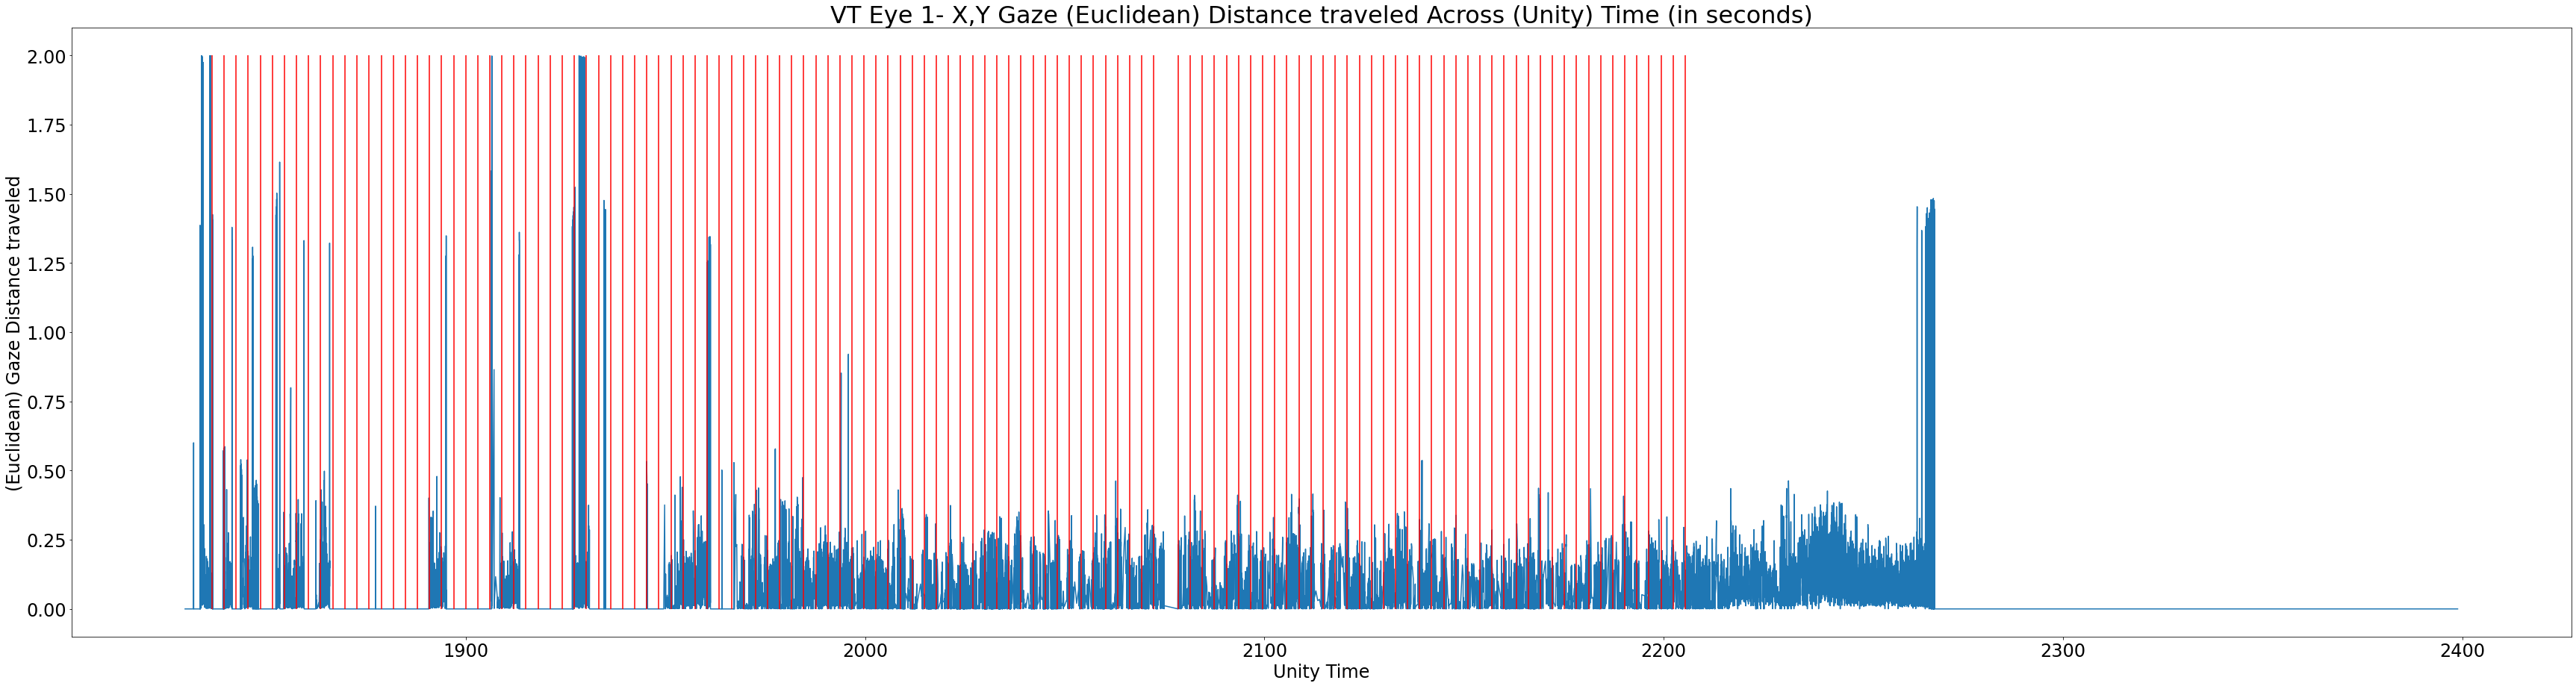

In [17]:
_gaze_df = gaze_dict['VT'][1]

_events = vt_events

vt_ODdistances = []

for ix in range(1,len(_gaze_df)):
    vt_ODdistances.append(euc2d(_gaze_df.iloc[ix][['GazeDirection_x','GazeDirection_y']],_gaze_df.iloc[ix-1][['GazeDirection_x','GazeDirection_y']]))

_distances = vt_ODdistances 

fig, ax = plt.subplots(figsize=(60,15))
ax.plot(_gaze_df['unity_time'][1:], pd.Series(_distances))
# fprop = FontProperties(),
# fprop.set_size(size='x-large')
# ax.plot(oa_eventsOnsets_series)
plt.xlabel('Unity Time',fontsize=24)
plt.ylabel('(Euclidean) Gaze Distance traveled',fontsize=24)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.title('VT Eye 1- X,Y Gaze (Euclidean) Distance traveled Across (Unity) Time (in seconds)',fontsize=32)

plt.vlines(x=_events,ymin=0,ymax=max(_distances),colors='red')
# ax.set_xticklabels(events,rotation=45,fontproperties=fprop)
plt.tick_params()
plt.show()

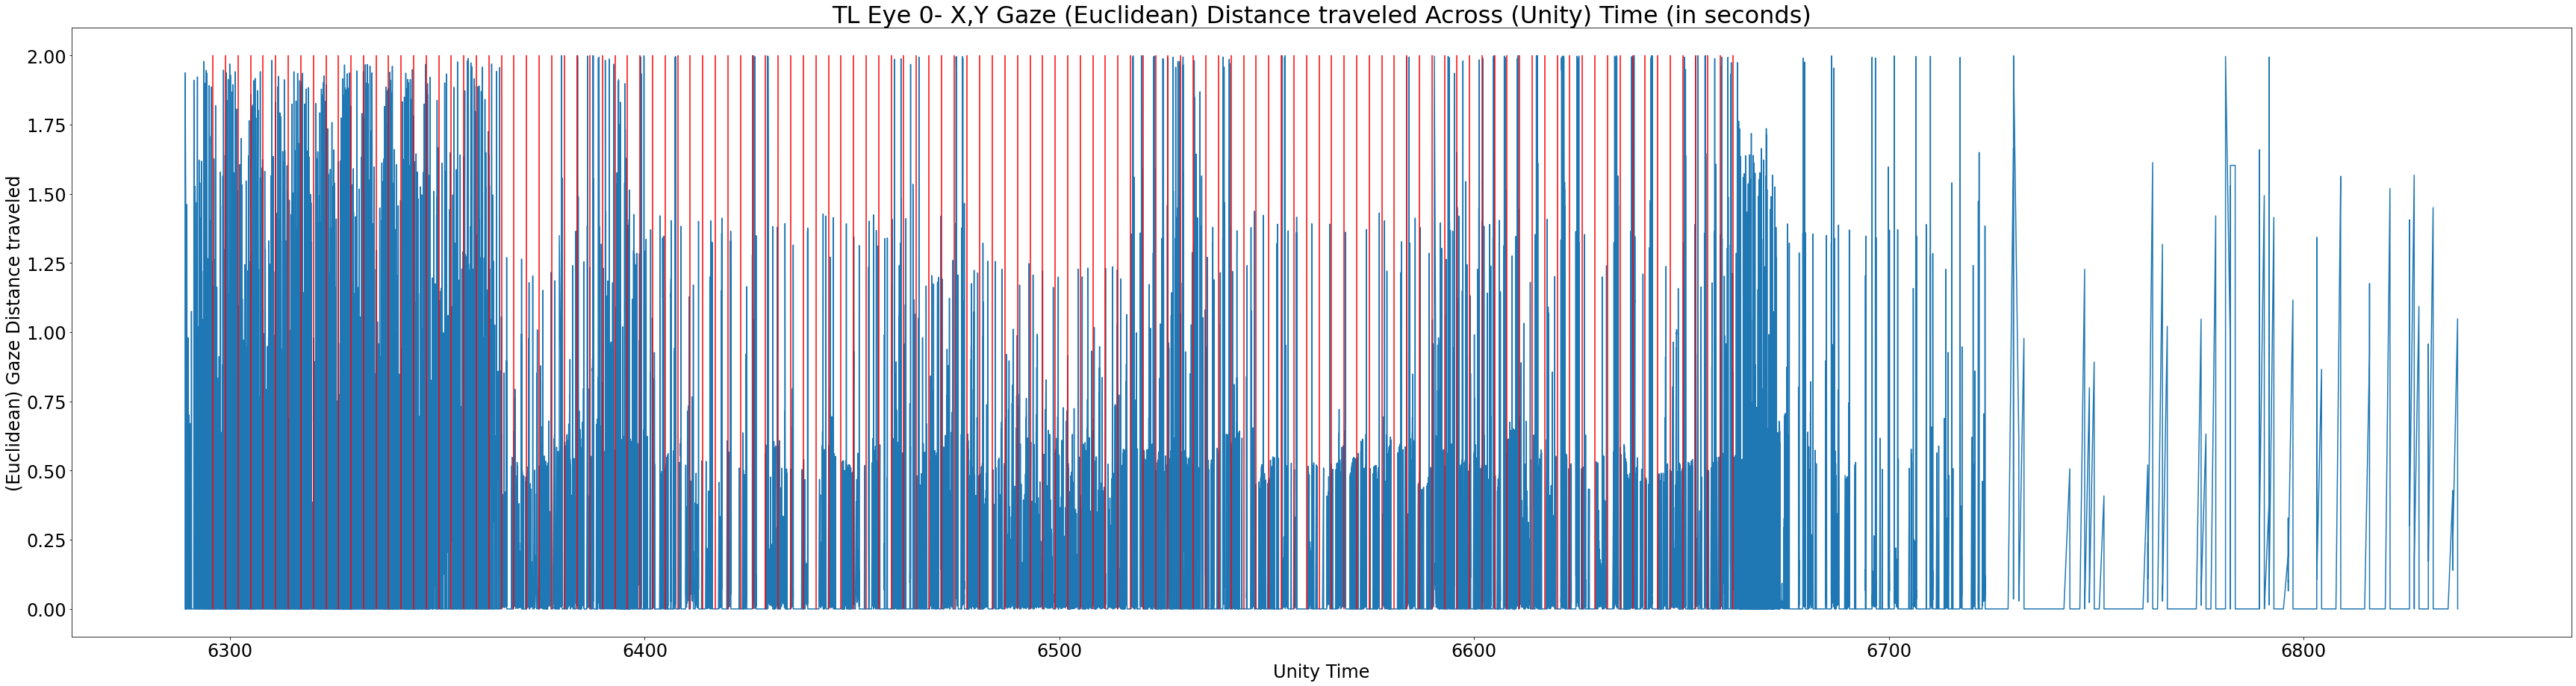

In [132]:
_gaze_df = gaze_dict['TL'][0]

_events = tl_events

tl_OSdistances = []

for ix in range(1,len(_gaze_df)):
    tl_OSdistances.append(euc2d(_gaze_df.iloc[ix][['GazeDirection_x','GazeDirection_y']],_gaze_df.iloc[ix-1][['GazeDirection_x','GazeDirection_y']]))

_distances = tl_OSdistances 

fig, ax = plt.subplots(figsize=(60,15))
ax.plot(_gaze_df['unity_time'][1:], pd.Series(_distances))
# fprop = FontProperties(),
# fprop.set_size(size='x-large')
# ax.plot(oa_eventsOnsets_series)
plt.xlabel('Unity Time',fontsize=24)
plt.ylabel('(Euclidean) Gaze Distance traveled',fontsize=24)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.title('TL Eye 0- X,Y Gaze (Euclidean) Distance traveled Across (Unity) Time (in seconds)',fontsize=32)

plt.vlines(x=_events,ymin=0,ymax=max(_distances),colors='red')
# ax.set_xticklabels(events,rotation=45,fontproperties=fprop)
plt.tick_params()
plt.show()

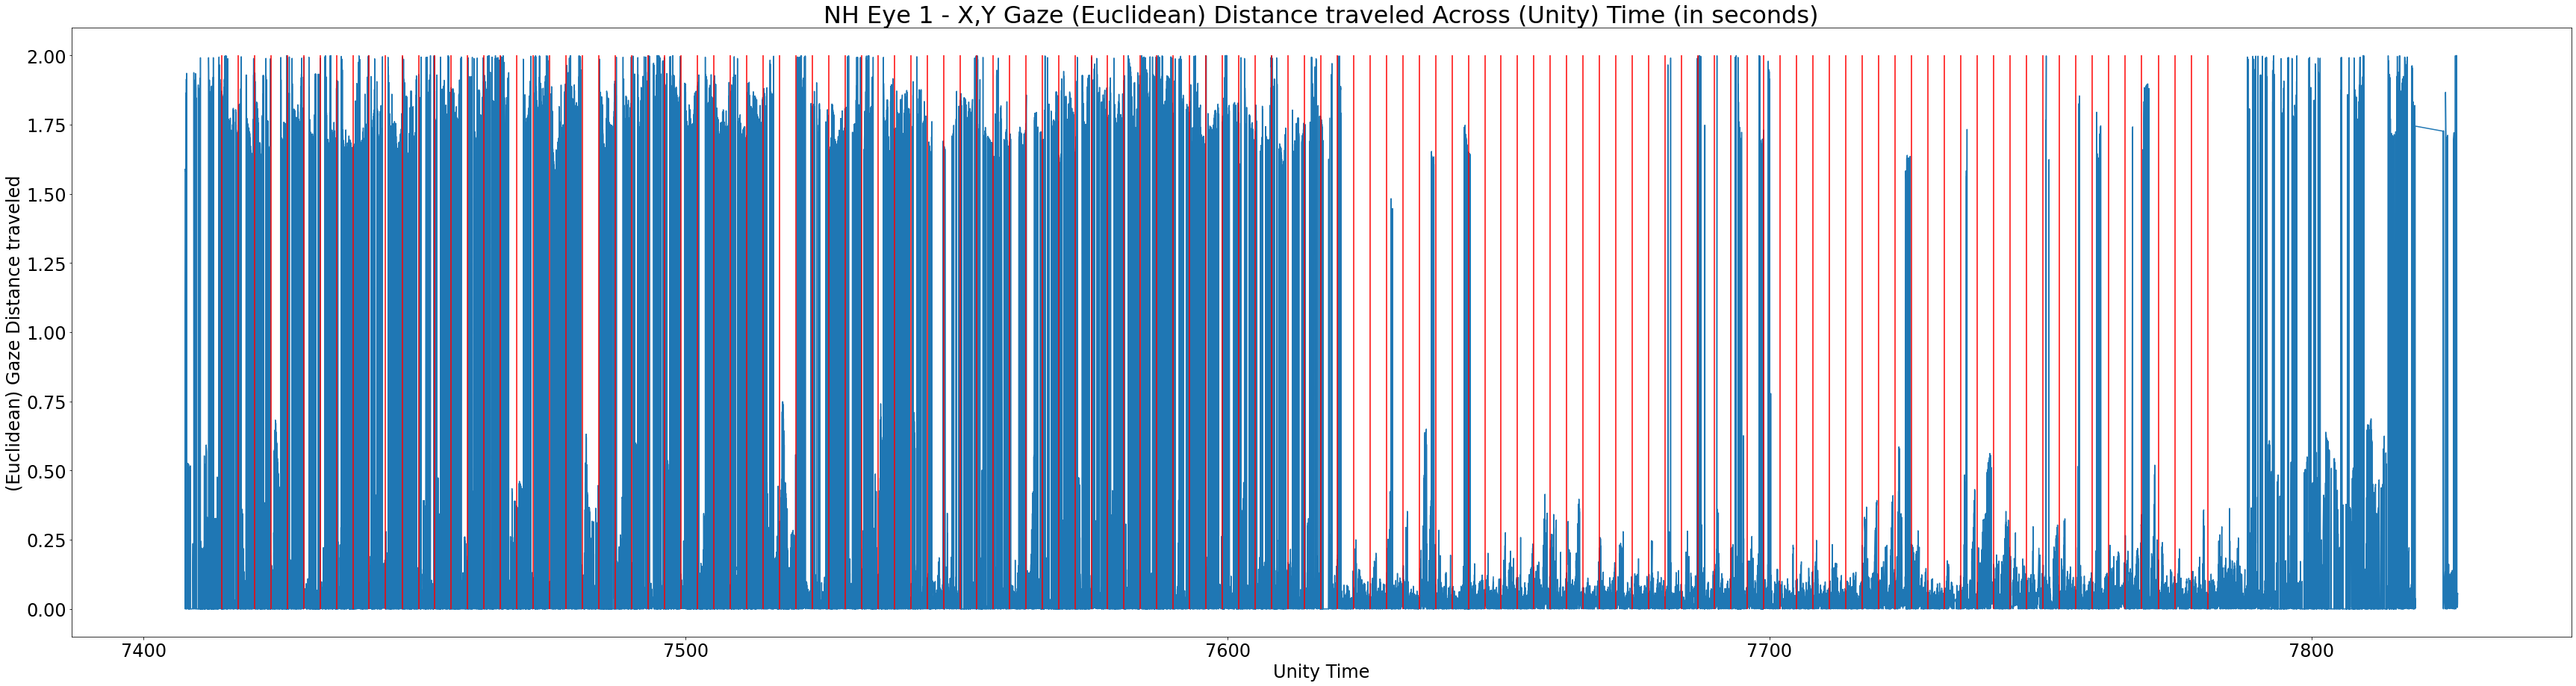

In [133]:
_gaze_df = gaze_dict['NH'][1]

_events = nh_events

nh_ODdistances = []

for ix in range(1,len(_gaze_df)):
    nh_ODdistances.append(euc2d(_gaze_df.iloc[ix][['GazeDirection_x','GazeDirection_y']],_gaze_df.iloc[ix-1][['GazeDirection_x','GazeDirection_y']]))

_distances = nh_ODdistances 

fig, ax = plt.subplots(figsize=(60,15))
ax.plot(_gaze_df['unity_time'][1:], pd.Series(_distances))
# fprop = FontProperties(),
# fprop.set_size(size='x-large')
# ax.plot(oa_eventsOnsets_series)
plt.xlabel('Unity Time',fontsize=24)
plt.ylabel('(Euclidean) Gaze Distance traveled',fontsize=24)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.title('NH Eye 1 - X,Y Gaze (Euclidean) Distance traveled Across (Unity) Time (in seconds)',fontsize=32)

plt.vlines(x=_events,ymin=0,ymax=max(_distances),colors='red')
# ax.set_xticklabels(events,rotation=45,fontproperties=fprop)
plt.tick_params()
plt.show()

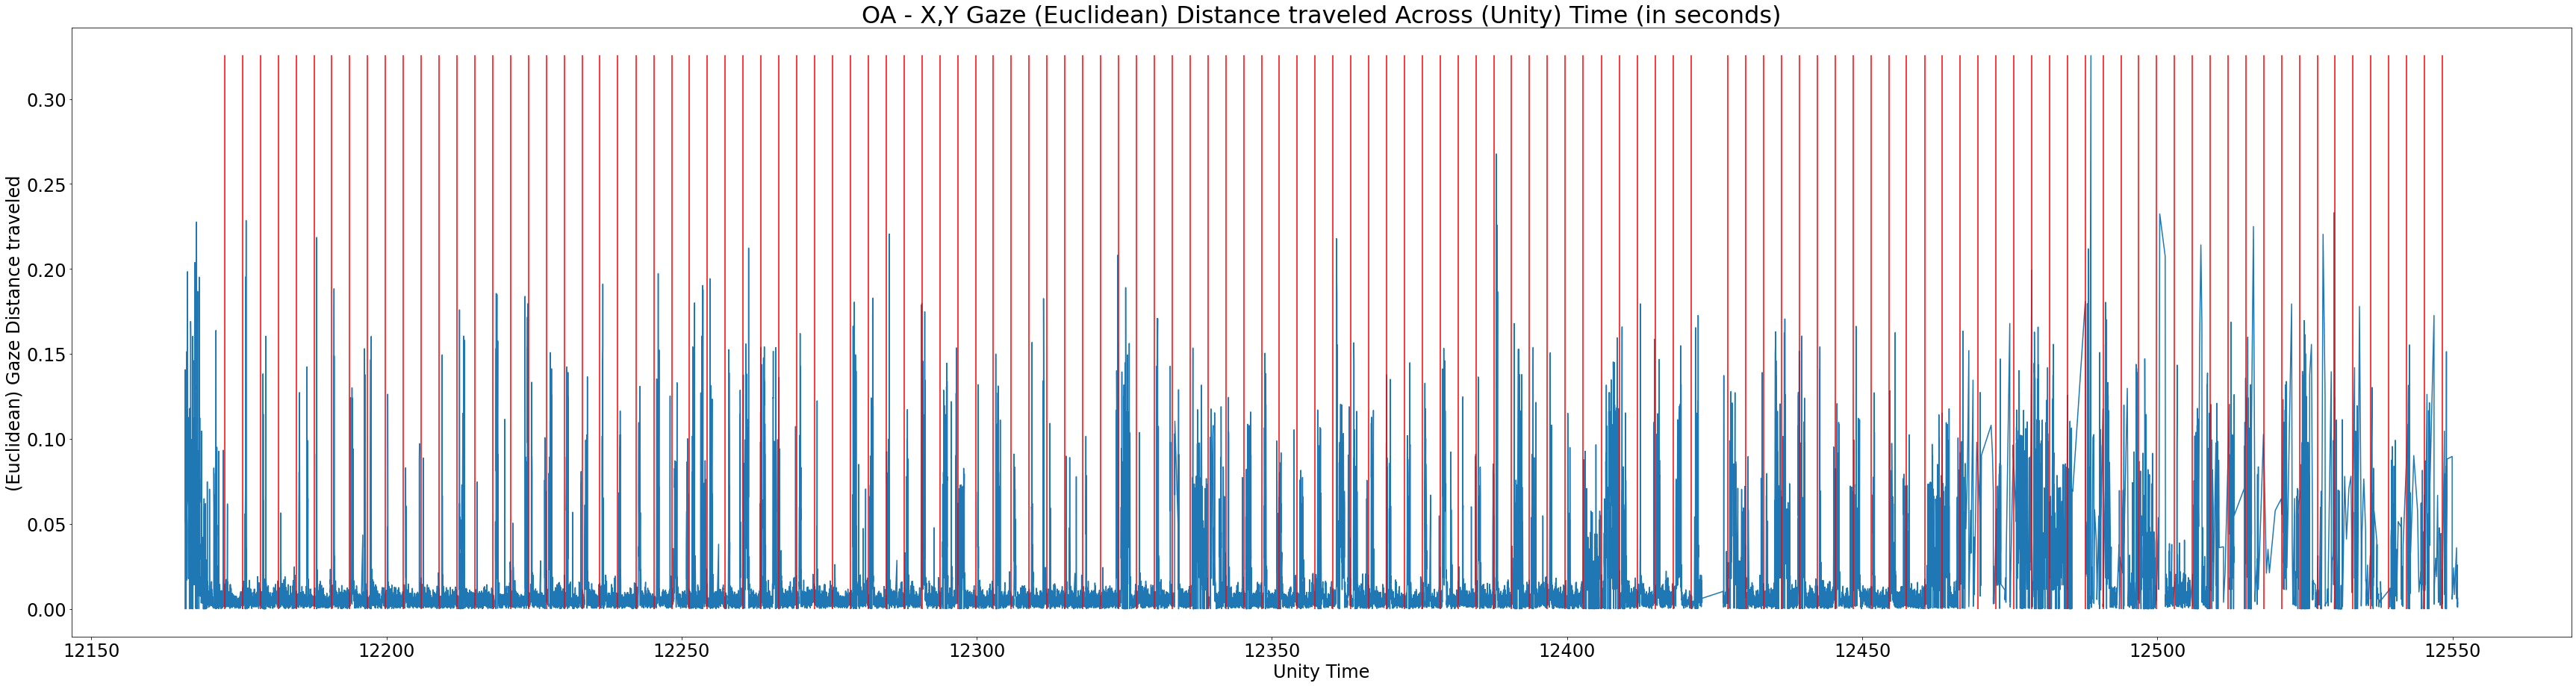

In [323]:
fig, ax = plt.subplots(figsize=(60,15))
ax.plot(oa_OSgaze_df['unity_time'][1:], pd.Series(oa_OSdistances))
# fprop = FontProperties(),
# fprop.set_size(size='x-large')
# ax.plot(oa_eventsOnsets_series)
plt.xlabel('Unity Time',fontsize=24)
plt.ylabel('(Euclidean) Gaze Distance traveled',fontsize=24)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.title('OA - X,Y Gaze (Euclidean) Distance traveled Across (Unity) Time (in seconds)',fontsize=32)

events = oa_eventsOnsets_series
plt.vlines(x=events,ymin=0,ymax=max(oa_OSdistances),colors='red')
# ax.set_xticklabels(events,rotation=45,fontproperties=fprop)
plt.tick_params()
plt.show()

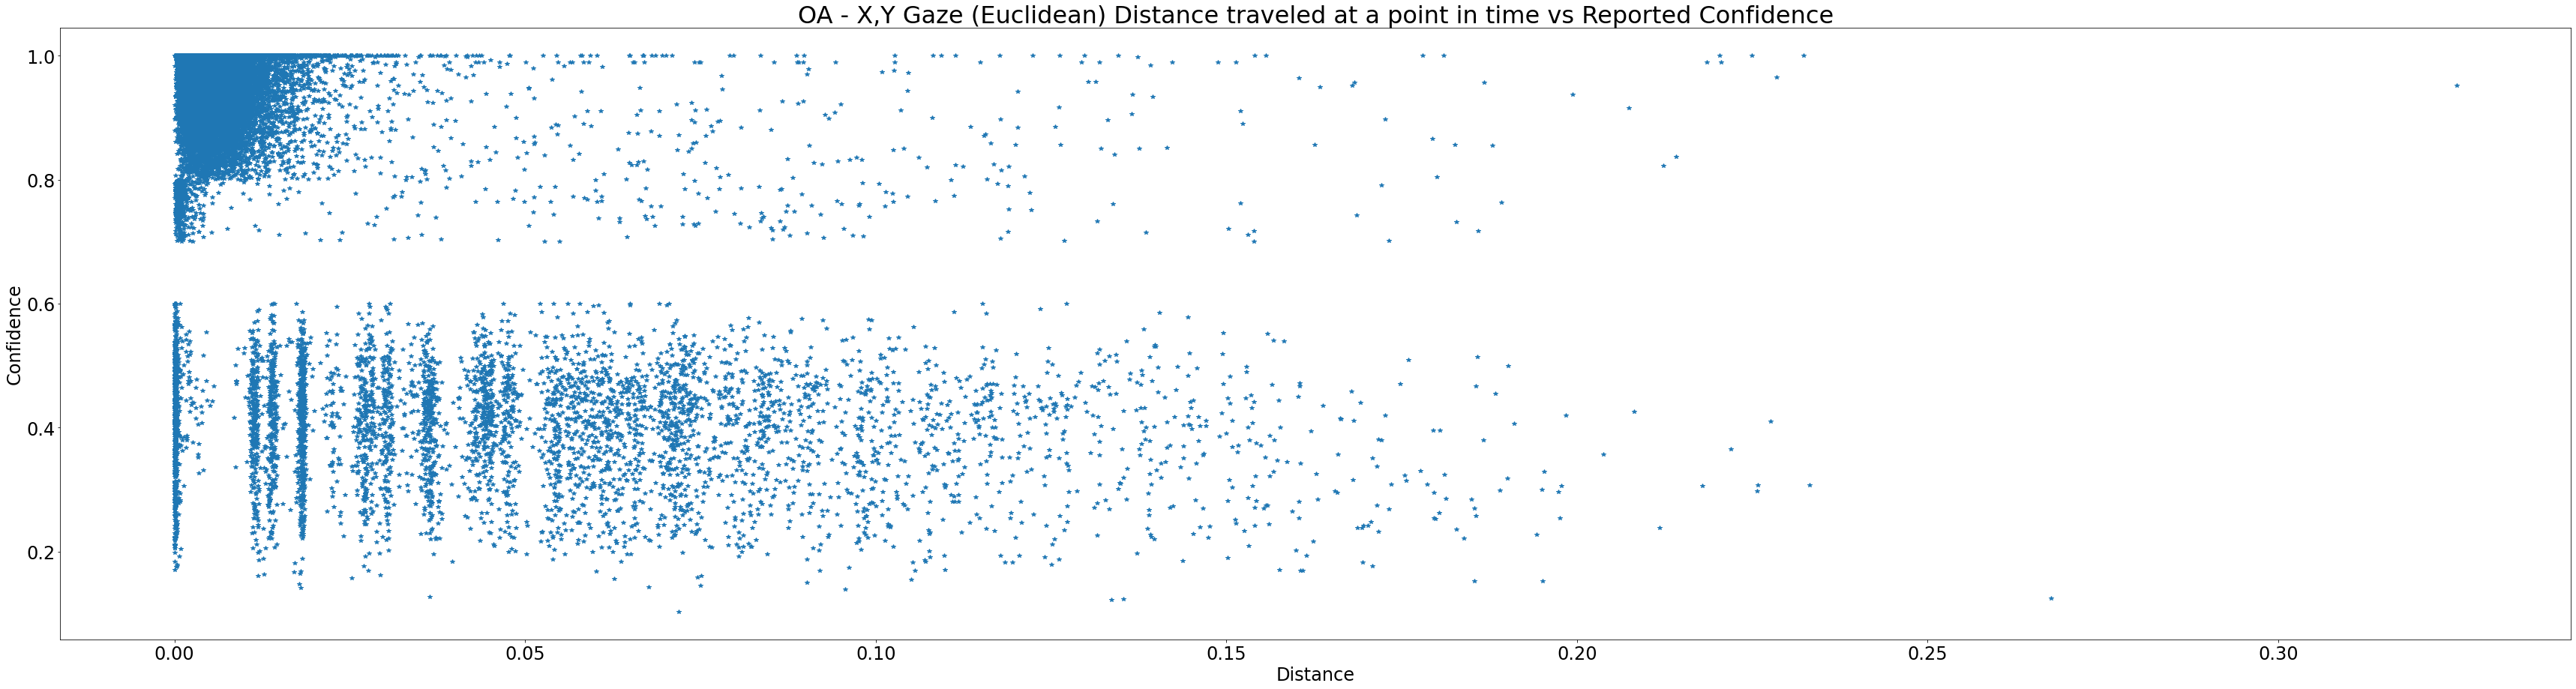

In [332]:
fig, ax = plt.subplots(figsize=(60,15))
ax.plot(pd.Series(oa_OSdistances),oa_OSgaze_df['confidence'][1:] ,'*')
# fprop = FontProperties(),
# fprop.set_size(size='x-large')
# ax.plot(oa_eventsOnsets_series)
plt.xlabel('Distance',fontsize=24)
plt.ylabel('Confidence',fontsize=24)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.title('OA - X,Y Gaze (Euclidean) Distance traveled at a point in time vs Reported Confidence',fontsize=32)

# events = oa_eventsOnsets_series
# plt.vlines(x=events,ymin=0,ymax=max(oa_OSdistances),colors='red')
# ax.set_xticklabels(events,rotation=45,fontproperties=fprop)
plt.tick_params()
plt.show()

In [345]:
pearsonr(pd.Series(oa_OSdistances),oa_OSgaze_df['confidence'][1:])

(-0.6244884525652287, 0.0)

In [324]:
sg_OSdistances = []
for ix in range(1,len(sg_OSgaze_df)):
    sg_OSdistances.append(euc2d(sg_OSgaze_df.iloc[ix][['GazeDirection_x','GazeDirection_y']],sg_OSgaze_df.iloc[ix-1][['GazeDirection_x','GazeDirection_y']]))

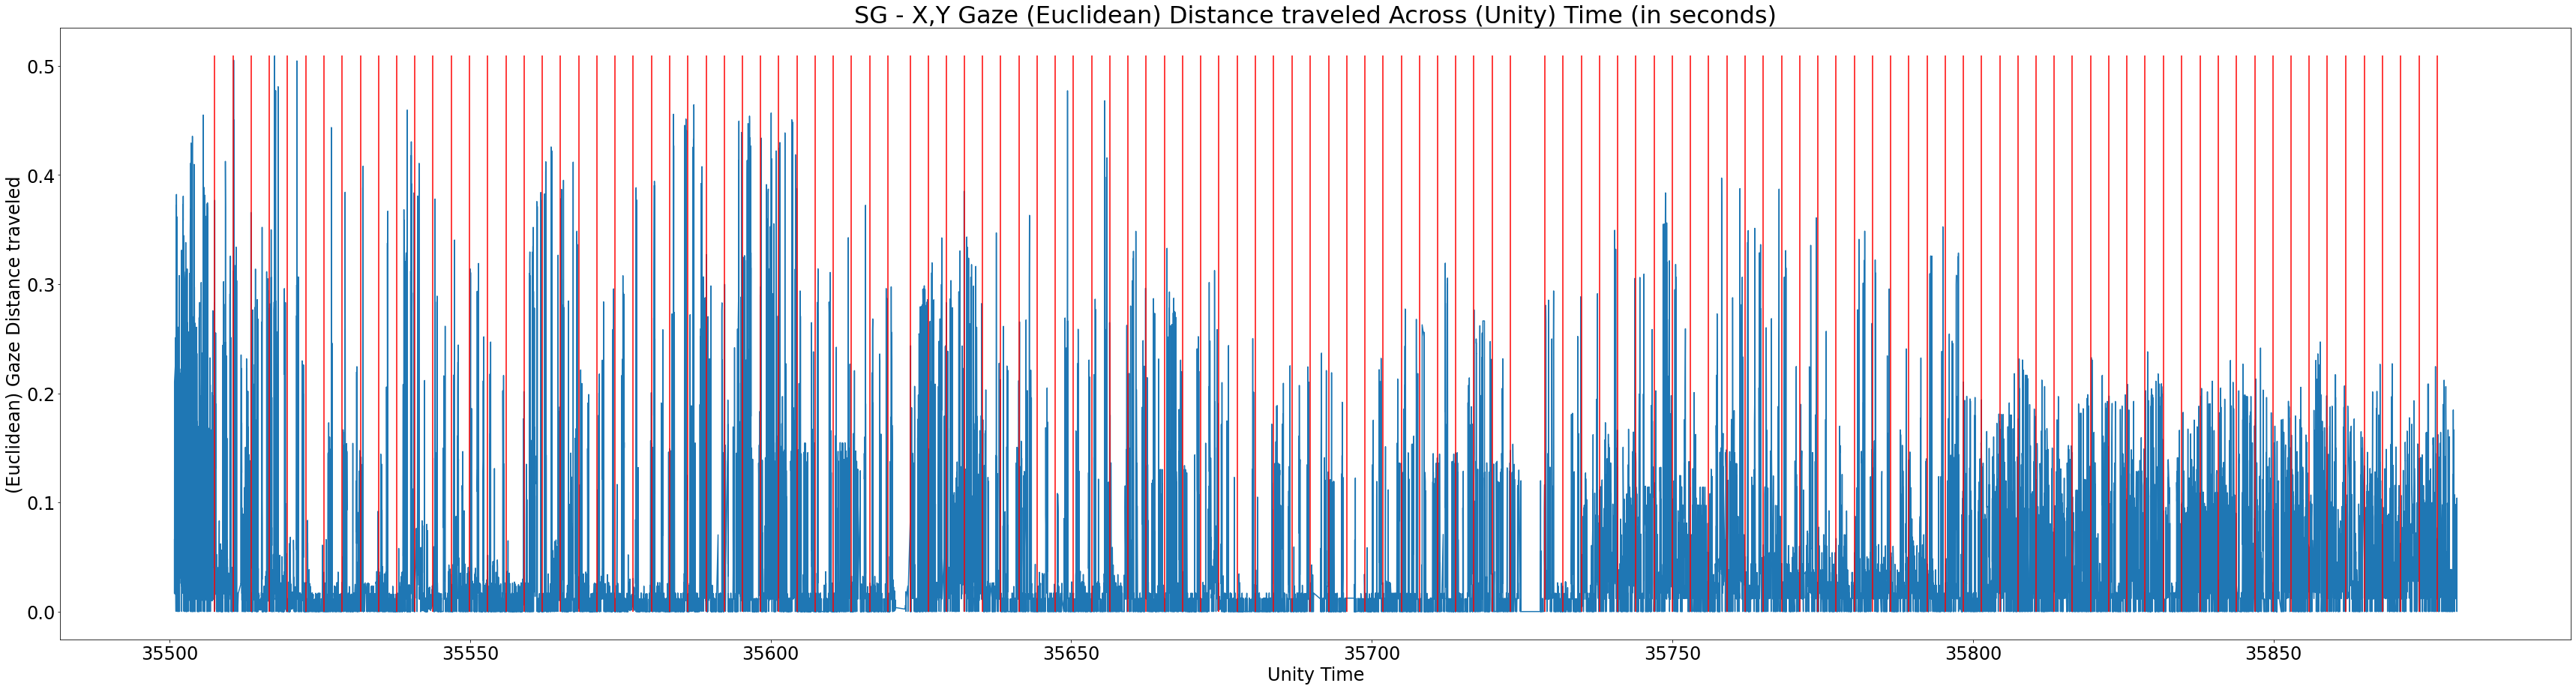

In [325]:
fig, ax = plt.subplots(figsize=(60,15))
ax.plot(sg_OSgaze_df['unity_time'][1:], pd.Series(sg_OSdistances))
# fprop = FontProperties(),
# fprop.set_size(size='x-large')
# ax.plot(oa_eventsOnsets_series)
plt.xlabel('Unity Time',fontsize=24)
plt.ylabel('(Euclidean) Gaze Distance traveled',fontsize=24)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.title('SG - X,Y Gaze (Euclidean) Distance traveled Across (Unity) Time (in seconds)',fontsize=32)

events = sg_eventsOnsets_series
plt.vlines(x=events,ymin=0,ymax=max(sg_OSdistances),colors='red')
# ax.set_xticklabels(events,rotation=45,fontproperties=fprop)
plt.tick_params()
plt.show()

In [340]:
from scipy.stats import pearsonr

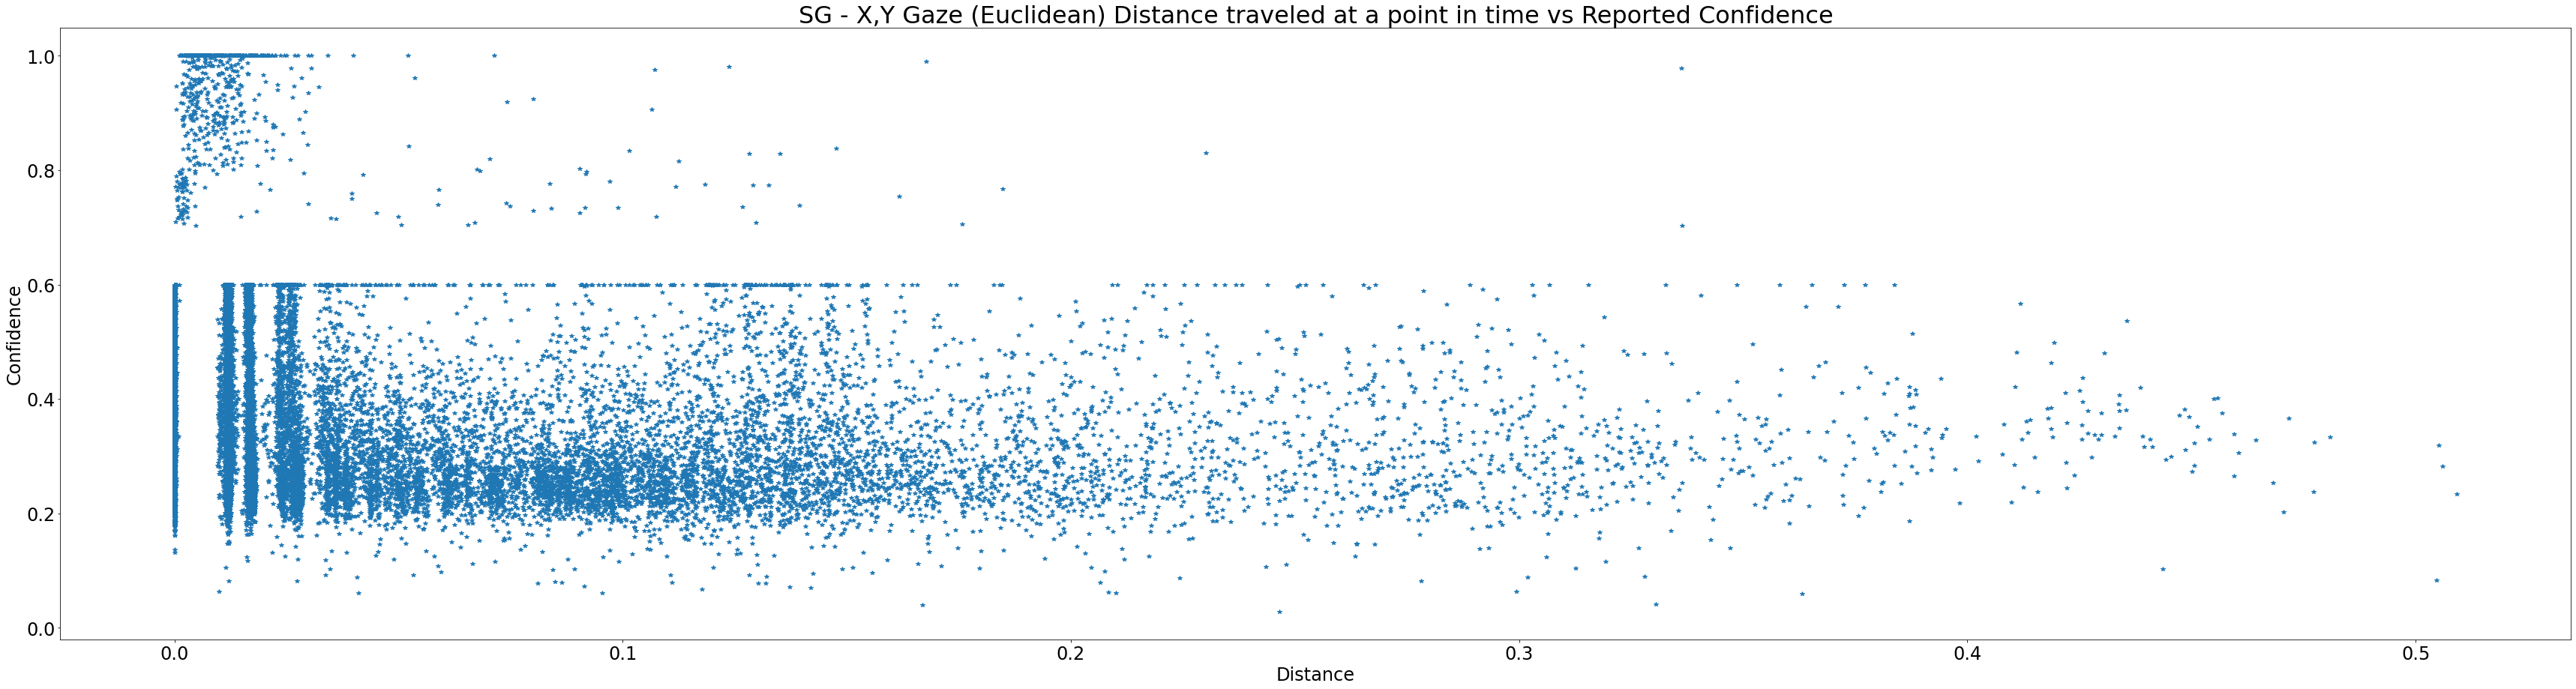

In [331]:
fig, ax = plt.subplots(figsize=(60,15))
ax.plot(pd.Series(sg_OSdistances),sg_OSgaze_df['confidence'][1:] ,'*')
# fprop = FontProperties(),
# fprop.set_size(size='x-large')
# ax.plot(oa_eventsOnsets_series)
plt.xlabel('Distance',fontsize=24)
plt.ylabel('Confidence',fontsize=24)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.title('SG - X,Y Gaze (Euclidean) Distance traveled at a point in time vs Reported Confidence',fontsize=32)

# events = oa_eventsOnsets_series
# plt.vlines(x=events,ymin=0,ymax=max(oa_OSdistances),colors='red')
# ax.set_xticklabels(events,rotation=45,fontproperties=fprop)
plt.tick_params()
plt.show()

In [341]:
pearsonr(pd.Series(sg_OSdistances),sg_OSgaze_df['confidence'][1:])

(-0.3597420675733706, 0.0)

In [344]:
pearsonr(pd.Series(oa_OSdistances), oa_OSgaze_df['confidence'][1:])

(-0.6244884525652287, 0.0)

In [215]:
for ix in rang
oa_gaze_df[['GazeDirection_x','GazeDirection_y']].iterrows():
    break

In [216]:
row

GazeDirection_x    0.246274
GazeDirection_y   -0.637449
Name: 0, dtype: float64

In [219]:
euc2d(row,(0,0))

0.6833681741361753

In [221]:
np.sqrt(.24**2+.63**2)

0.674166151627327

In [90]:
max(oa_eventsOnsets_series) - min(oa_eventsOnsets_series)

37.562814290000006

In [184]:
max(oa_eventsOnsets_series[:100]) - min(oa_eventsOnsets_series[:100])

30.303803849999895

In [95]:
len(oa_eventsOnsets_series)

124

In [138]:
len(sg_eventsOnsets_series)

122

In [134]:
len(nc_events)

122

In [135]:
nc_eventsIntervals_series = pd.Series([nc_events[e+1]-nc_events[e] for e in range(len(nc_events[:100]))])
nc_eventsIntervals_series.describe()

count    100.000000
mean       3.025336
std        0.008105
min        3.010803
25%        3.020324
50%        3.025250
75%        3.028834
max        3.056953
dtype: float64

In [137]:
len(vt_events)

122

In [136]:
vt_eventsIntervals_series = pd.Series([vt_events[e+1]-vt_events[e] for e in range(len(vt_events[:100]))])
vt_eventsIntervals_series.describe()

count    100.000000
mean       3.054588
std        0.308505
min        3.000931
25%        3.017844
50%        3.023710
75%        3.028799
max        6.107840
dtype: float64

In [138]:
len(tl_events)

122

In [139]:
tl_eventsIntervals_series = pd.Series([tl_events[e+1]-tl_events[e] for e in range(len(tl_events[:100]))])
tl_eventsIntervals_series.describe()

count    100.000000
mean       3.029730
std        0.022901
min        3.005629
25%        3.019760
50%        3.025241
75%        3.033030
max        3.196306
dtype: float64

In [141]:
len(nh_events)

122

In [142]:
nh_eventsIntervals_series = pd.Series([nh_events[e+1]-nh_events[e] for e in range(len(nh_events[:100]))])
nh_eventsIntervals_series.describe()

count    100.000000
mean       3.026375
std        0.007636
min        3.008551
25%        3.022113
50%        3.026814
75%        3.028910
max        3.049898
dtype: float64

In [188]:
oa_eventsIntervals_series = pd.Series([oa_eventsOnsets_series[e+1]-oa_eventsOnsets_series[e] for e in range(len(oa_eventsOnsets_series[:100]))])

In [189]:
oa_eventsIntervals_series.describe()

count    100.000000
mean       0.306066
std        0.032288
min        0.301106
25%        0.302174
50%        0.302705
75%        0.303277
max        0.625524
dtype: float64

<AxesSubplot:>

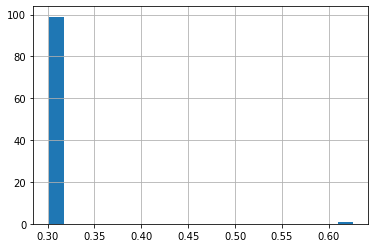

In [202]:
oa_eventsIntervals_series.hist(bins=20)

In [200]:
oa_eventsIntervals_series[oa_eventsIntervals_series > 0.31]

76    0.310225
82    0.625524
dtype: float64

In [96]:
[oa_eventsOnsets_series[e+1]-oa_eventsOnsets_series[e] for e in range(len(oa_eventsOnsets_series)-1)]

[0.30266510999990714,
 0.3025546700000632,
 0.3019516899998962,
 0.3014022400000158,
 0.3016628600000786,
 0.30242939999993723,
 0.30159129000003304,
 0.3017914800000199,
 0.30455264000011084,
 0.3021413799999664,
 0.30330674999981966,
 0.3027361500001007,
 0.3040894499999922,
 0.3024070799999663,
 0.30285015000004023,
 0.303239529999928,
 0.3015104099999917,
 0.3040994100001626,
 0.30218500999990283,
 0.3026032400000531,
 0.301158439999881,
 0.3032740300000114,
 0.30476936000013666,
 0.3041717900000549,
 0.3032125099998666,
 0.30187328000010893,
 0.3022752800000035,
 0.303649729999961,
 0.30196862999991936,
 0.3013126099999681,
 0.30174748000013096,
 0.3028549999999086,
 0.3034849099999519,
 0.3038941900001646,
 0.30485333000001447,
 0.30266225999980634,
 0.30273312000008445,
 0.30270373000007567,
 0.30287965999991684,
 0.30245293000007223,
 0.3038606099999015,
 0.3026590199999646,
 0.30110568999998577,
 0.3020615000000362,
 0.3048343499999646,
 0.3029600500001379,
 0.3021477199999935

In [ ]:
[sg_eventsOnsets_series[e+1]-sg_eventsOnsets_series[e] for e in range(len(sg_eventsOnsets_series)-1)]

In [91]:
max(sg_eventsOnsets_series) - min(sg_eventsOnsets_series)

36.96966070999997

In [185]:
max(sg_eventsOnsets_series[:100]) - min(sg_eventsOnsets_series[:100])

30.296043920000102

In [192]:
sg_eventsIntervals_series = pd.Series([sg_eventsOnsets_series[e+1]-sg_eventsOnsets_series[e] for e in range(len(sg_eventsOnsets_series[:100]))])

In [193]:
sg_eventsIntervals_series.describe()

count    100.000000
mean       0.305976
std        0.028114
min        0.295434
25%        0.301932
50%        0.302587
75%        0.303162
max        0.575207
dtype: float64

<AxesSubplot:>

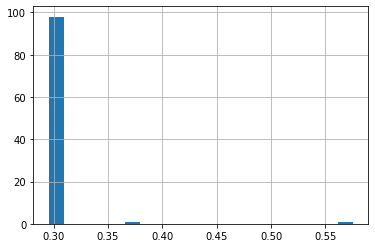

In [201]:
sg_eventsIntervals_series.hist(bins=20)

In [195]:
sg_eventsIntervals_series[(sg_eventsIntervals_series < 0.3) | (sg_eventsIntervals_series > 0.31)]

37    0.372726
38    0.295434
71    0.575207
dtype: float64

In [144]:
vt_eventsIntervals_series[(vt_eventsIntervals_series < 3.0) | (vt_eventsIntervals_series > 3.1)]

78    6.10784
dtype: float64

In [84]:
# no overlap between moment of data collection and moment of events onset
# assuming events csv is in unity_time 

In [26]:
oa_events_df_testnohead = pd.read_csv('/Volumes/Experiment Data/Sasha and Or/OA/Events.csv',on_bad_lines='warn',header=None)

b'Skipping line 3: expected 4 fields, saw 6\nSkipping line 4: expected 4 fields, saw 6\nSkipping line 5: expected 4 fields, saw 6\nSkipping line 6: expected 4 fields, saw 6\nSkipping line 7: expected 4 fields, saw 6\nSkipping line 8: expected 4 fields, saw 6\nSkipping line 9: expected 4 fields, saw 6\nSkipping line 10: expected 4 fields, saw 6\nSkipping line 11: expected 4 fields, saw 6\nSkipping line 12: expected 4 fields, saw 6\nSkipping line 13: expected 4 fields, saw 6\nSkipping line 14: expected 4 fields, saw 6\nSkipping line 15: expected 4 fields, saw 6\nSkipping line 16: expected 4 fields, saw 6\nSkipping line 17: expected 4 fields, saw 6\nSkipping line 18: expected 4 fields, saw 6\nSkipping line 19: expected 4 fields, saw 6\nSkipping line 20: expected 4 fields, saw 6\nSkipping line 21: expected 4 fields, saw 6\nSkipping line 22: expected 4 fields, saw 6\nSkipping line 23: expected 4 fields, saw 6\nSkipping line 24: expected 4 fields, saw 6\nSkipping line 25: expected 4 fields, 